<a href="https://colab.research.google.com/github/Kunalwagh107/n-python-numpy-pandas/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *pandas*

In [ ]:
import pandas as pd
import numpy as np

# *#pandas series*

In [ ]:
# 1D array can hold any data type -> like a column in table
# -->  it has value and index --> 2 things and name
# dtype -> strings -> usually named as Object

## *creating pd.Series()*




In [ ]:
# string --> default pick as dtype : object
country = ['India','China','USA'] # <-- any iterable source
pd.Series(country)

,0
0,India
1,China
2,USA


In [ ]:
# integer --> default pick as dtype : int64
runs = [12,23,45,34,np.nan]
runs = pd.Series(runs)
runs

,0
0,12.0
1,23.0
2,45.0
3,34.0
4,NaN


In [ ]:
# custom indexing with name setting --> both should be same count
subject = ['Stat','AI','ML']
marks = [100,101,102]
marks = pd.Series(marks,index=subject,name='Kunal Marks')

### *-series from dict*

In [ ]:
d = {
    'Math':101,
    'Stat':100,
    'AI': 100,
    'ML':np.nan
}

marks = pd.Series(d,name='Kunal') # <-- default take keys as index
marks

,Kunal
Math,101.0
Stat,100.0
AI,100.0
ML,NaN


### *-read_csv*

#### *--single column - pd.Series*

In [ ]:
path_subs = '/content/drive/MyDrive/4. Data Files/Pandas/Series/series.csv'
#-------------------------------------------------------------------------------
subs = pd.read_csv(path_subs)
print(subs) # <- default = DataFrame ->gives indexing -> First element as name
print(type(subs))

# to convert it into series ---> .squeeze()
subs = pd.read_csv(path_subs).squeeze()
print(type(subs))
print(subs)

     Subscribers Gained
0                   521
1                   416
2                   662
3                    63
4                   940
..                  ...
402                 238
403                 703
404                 788
405                 360
406                  43

[407 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
0      521
1      416
2      662
3       63
4      940
      ... 
402    238
403    703
404    788
405    360
406     43
Name: Subscribers Gained, Length: 407, dtype: int64


#### *--2 columns - one as index and other as value*

In [ ]:
# --> data with 2 columns(match_num, runs) --> need match_num as index
rohit_runs = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Series/runs.csv',index_col= 'match_num').squeeze()
print(rohit_runs)
# runs will be name of the pd.Series() #--> index should be unique but it will not throw an erorr if it is same

match_num
1      100
2      257
3      291
4      197
5      244
      ... 
195    173
196      4
197    186
198     26
199    136
Name: runs, Length: 199, dtype: int64


In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Series/movies.csv',index_col='movie_name').squeeze()
movies

,lead_actor
movie_name,
Golden Boys,Jeet Goswami
Kaccha Limboo,Karan Bhanushali
Not A Love Story,Mahie Gill
Qaidi Band,Aadar Jain
Chaatwali,Aadil Khan
...,...
Fight Club,Zayed Khan
Strings Of Paasion,Zeenat Aman
Dunno Y Na Jaane Kyun,Zeenat Aman


## *series attributes*


1.   **.size**  *#---> includes missing*
2.   **.dtype**
3.   **.name**
4.   **.is_unique** *#--->checks if all items are unique*
5.   **.index**
6.   **.values**



In [ ]:
# size --> how many items --> counts missing as well
print(marks)
marks.size # --> 4 items

Math    101.0
Stat    100.0
AI      100.0
ML        NaN
Name: Kunal, dtype: float64


4

In [ ]:
marks.dtype # ---> data type #<--due to NaN is float --> uppercast

dtype('float64')

In [ ]:
marks.name

'Kunal'

In [ ]:
k = pd.Series([1,2,3])
print(k.name)

None


In [ ]:
marks.is_unique #-> checks if all items are unique or not -> check how to use it on np arrays

False

In [ ]:
marks.index #--> gives index object --> immutable

Index(['Math', 'Stat', 'AI', 'ML'], dtype='object')

In [ ]:
runs.index # --> gives range index --> special object --> generates special objects

RangeIndex(start=0, stop=5, step=1)

In [ ]:
marks.values # ---> gets numpy array

array([101., 100., 100.,  nan])

## series methods


### *-general Series methods*

1.   **.head(n)**/ **.tail(n)**/ **.sample(n)**
2.   **.value_counts**()
3.   **.sort_value**(ascending = False) <-- default True
4.   **.sort_index**(ascending = False) <-- default True


In [ ]:
# .head() and .tail() --> default shows top/bottom 5 rows

subs.head() # <-- we can provide values in brackets if want to go beyound 5
subs.head(10)

,Subscribers Gained
0,521
1,416
2,662
3,63
4,940
5,666
6,495
7,413
8,170
9,340


In [ ]:
# .sample() --> shows one random row from sample

movies.sample() # <-- can specify numbers ()<-- here as well
# --> to remove the bias of data

,lead_actor
movie_name,
Life Goes On,Sharmila Tagore


In [ ]:
# .value_counts --> frquency count of values as a new series with value as index and frequencies as values

movies.value_counts() # <--- values in descending order -> this is new series



,count
lead_actor,
Akshay Kumar,48
Ajay Devgn,35
Salman Khan,27
Emraan Hashmi,27
Amitabh Bachchan,21
...,...
Mohit Chauhan,1
Mohd. Samad,1
Mishti,1


In [ ]:
# .sort_values --> sort values -> not permenant change

rohit_runs.sort_values() # default ascending
rohit_runs.sort_values(ascending=False) #---> this will give descending

# utility --> method chaining
rohit_runs.sort_values(ascending=False).head(5) # <--- gives top 5
rohit_runs.sort_values(ascending=False).head(5).values # <-- only values
rohit_runs.sort_values(ascending=False).head(5).values[0] #<--first value

np.int64(297)

In [ ]:
# .sort_values(inplace=True) --> to change it in permanant change
rohit_runs = rohit_runs.copy()
rohit_runs.sort_values(inplace=True) # discouraged -> use re-assignment
rohit_runs

,runs
match_num,
40,3
196,4
143,5
70,10
166,10
...,...
173,294
182,294
52,295


In [ ]:
# .sort_index() -> # default - ascending

print(movies)
movies.sort_index() # --> sorted based on index

movie_name
Golden Boys                              Jeet Goswami
Kaccha Limboo                        Karan Bhanushali
Not A Love Story                           Mahie Gill
Qaidi Band                                 Aadar Jain
Chaatwali                                  Aadil Khan
                                           ...       
Fight Club                                 Zayed Khan
Strings Of Paasion                        Zeenat Aman
Dunno Y Na Jaane Kyun                     Zeenat Aman
Taj Mahal - An Eternal Love Story         Zulfi Sayed
Mr. Hot Mr. Kool                          Zulfi Sayed
Name: lead_actor, Length: 1698, dtype: object


,lead_actor
movie_name,
...And Once Again,Rajat Kapoor
10ml Love,Rajat Kapoor
13 May Gulabi Nagar,Raj Verma
13B,R. Madhavan
15 Park Avenue,Shabana Azmi
...,...
Zindagi Tere Naam,Mithun Chakraborty
Ziyarat,Irfan Choudhary
Zokkomon,Darsheel Safary


### *-important series methods*


1.   **.astype**('data_type')
2.   **.between**(upper_range,lower_range)
3.   **.clip**(upper_range, lower_range)
4.   **.drop_duplicates**(keep='first or last')
5.   **.isnull**()**.sum**() --> missing values
6.   **.dropna**()/**.fillna**(condition/value)
7.   **.apply**(lambda x : custom logic x)
8.   **.copy**()

In [ ]:
# .astype('datatype') --> chage the size of Series

import sys

sys.getsizeof(rohit_runs)

3216

In [ ]:
sys.getsizeof(rohit_runs.astype('object'))

8788

In [ ]:
sys.getsizeof(rohit_runs)

3216

In [ ]:
# between --> checks if value exists in range --> returns bool

rohit_runs[rohit_runs.between(51,99)] # --> both are included

,runs
match_num,
26,52
57,52
184,53
158,53
71,55
162,55
183,56
11,57
175,58


In [ ]:
# clip

subs.clip(100,200) # --> extreme values are clipped and between values are same

,Subscribers Gained
0,200
1,200
2,200
3,100
4,200
...,...
402,200
403,200
404,200
405,200


In [ ]:
# drop_duplicates
temp = pd.Series([1,2,2,3,3,1,1,2,2,3,4,4])
temp.drop_duplicates() # --> first occurence stays, others delete

,0
0,1
1,2
3,3
10,4


In [ ]:
temp.drop_duplicates(keep='last') # <-- this keeps the last occurence

,0
6,1
8,2
9,3
11,4


In [ ]:
k = movies.duplicated() # -> returns a new series with values as index and boolen as values
# we sum it to get the total duplicate values
k.sum() #

 # <-- count of duplicate values

np.int64(934)

In [ ]:
# dealing with missing values
data = pd.Series([1, np.nan, 3, 4, np.nan, 6, 7, 8, np.nan, 10, 11, np.nan, 13, 14, 15])
data

,0
0,1.0
1,NaN
2,3.0
3,4.0
4,NaN
5,6.0
6,7.0
7,8.0
8,NaN
9,10.0


In [ ]:
data.size

15

In [ ]:
data.count()

np.int64(11)

In [ ]:
data.isnull()

,0
0,False
1,True
2,False
3,False
4,True
5,False
6,False
7,False
8,True
9,False


In [ ]:
data.isnull().sum() #--> total number of missing values

np.int64(4)

In [ ]:
# handle --
# 1. remove

data.dropna() #--> gets new Series

,0
0,1.0
2,3.0
3,4.0
5,6.0
6,7.0
7,8.0
9,10.0
10,11.0
12,13.0
13,14.0


In [ ]:
# 2. replace

fill_zero = data.fillna(0)
fill_mean = data.fillna(data.mean()) # <-- we can apply custom logic
print(fill_zero)
print(fill_mean)

0      1.0
1      0.0
2      3.0
3      4.0
4      0.0
5      6.0
6      7.0
7      8.0
8      0.0
9     10.0
10    11.0
11     0.0
12    13.0
13    14.0
14    15.0
dtype: float64
0      1.000000
1      8.363636
2      3.000000
3      4.000000
4      8.363636
5      6.000000
6      7.000000
7      8.000000
8      8.363636
9     10.000000
10    11.000000
11     8.363636
12    13.000000
13    14.000000
14    15.000000
dtype: float64


In [ ]:
# isin --> checks multiple conditions in series

k = rohit_runs.isin([49,99,199,159])
rohit_runs[k]

,runs
match_num,
50,49
112,49
190,99


In [ ]:
# apply --> write custom logic

# need first name of actor and full capital
movies.apply(lambda x:x.split()[0].upper())


,lead_actor
movie_name,
Golden Boys,JEET
Kaccha Limboo,KARAN
Not A Love Story,MAHIE
Qaidi Band,AADAR
Chaatwali,AADIL
...,...
Fight Club,ZAYED
Strings Of Paasion,ZEENAT
Dunno Y Na Jaane Kyun,ZEENAT


In [ ]:
# more than average good day , less -> bad day

subs.apply(lambda x : 'good day' if x > subs.mean() else 'bad day')

,Subscribers Gained
0,good day
1,bad day
2,good day
3,bad day
4,good day
...,...
402,bad day
403,good day
404,good day
405,bad day


In [ ]:
# copy -->

five_match = rohit_runs.head()

five_match #<-- we are not getting copy -> it's view
# so any changes in this will change the original data

# correct approch
five_match = rohit_runs.head().copy() # -> creates copy

### *-series mathematical methods*

1.   .**count**()
2.   .**sum**()/.**product**()
3.   .**mean**()/.**median**()/.**mode**()/.**std**()/.**var**()
4.   .**min**()/.**max**()
5.   .**describe**()



In [ ]:
# count --> counts total number of items-> exludes missing
rohit_runs.count()

np.int64(199)

In [ ]:
# .sum & .product() --> sum of values
subs.sum()
subs.product() # <-- for bigger value returns 0

np.int64(0)

In [ ]:
# mean/median/mode/std/var --> all for values
subs.mean()
subs.median()
subs.mode()
subs.var() # <-- how spread out numbers are (squared measure)
subs.std() # <--- change wrt mean


280.4092842588118

In [ ]:
# .min() & .max()
subs.min()
subs.max()

997

In [ ]:
subs.describe()

,Subscribers Gained
count,407.000000
mean,491.199017
std,280.409284
min,16.000000
25%,255.000000
50%,464.000000
75%,740.000000
max,997.000000


In [ ]:
rohit_runs.describe( )

,runs
count,199.000000
mean,145.462312
std,83.575027
min,3.000000
25%,78.500000
50%,137.000000
75%,209.000000
max,297.000000


## *indexing[n] and slicing[:,[],<]*

In [ ]:
# on default index ---->
x = pd.Series([1123,34,34,54,5,65,667,6,344,34])
x[1]
#x[-1] # --> works only on positive indexing
x.iloc[-1] # this will work

np.int64(34)

In [ ]:
# on custom index
movies
print(movies['Golden Boys'])
print(movies[1]) # both will work but -> instead this use .iloc[1]
print(movies.iloc[-1]) # if custom indexing is string the negative indexing will work

Jeet Goswami
Karan Bhanushali
Zulfi Sayed


/tmp/ipython-input-715159055.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(movies[1]) # both will work but -> instead this use .iloc[1]


In [ ]:
# integer indexing
x = pd.Series([1,12,34,45,23,12,34,454,2])
print(x[1:3])
print(x[-5:]) # <- here it works unlike indexing
print(x[[1,4,5]]) # --> fancy indexing
print(x[x<10]) # --> boolean indexing

1    12
2    34
dtype: int64
4     23
5     12
6     34
7    454
8      2
dtype: int64
1    12
4    23
5    12
dtype: int64
0    1
8    2
dtype: int64


## *editing series*


In [ ]:
# genrally we use read in pandas but it gives us writing functionality as well
marks = marks.copy()
marks

,Kunal
Math,101.0
Stat,100.0
AI,100.0
ML,NaN


In [ ]:
# using indexing
marks['ML'] = 101
marks

,Kunal
Math,101.0
Stat,100.0
AI,100.0
ML,101.0


In [ ]:
marks['Algo'] = 100 # if not exist -> creates new item in the series
marks # --> for reading throw error but for writing -> adds it

,Kunal
Math,101.0
Stat,100.0
AI,100.0
ML,101.0
Algo,100.0


In [ ]:
marks[:2] = 101 # slicing
marks

,Kunal
Math,101.0
Stat,101.0
AI,100.0
ML,101.0
Algo,100.0


In [ ]:
# with fancy indexing
marks[['Algo','ML']] = 101
marks

,Kunal
Math,101.0
Stat,101.0
AI,100.0
ML,101.0
Algo,101.0


In [ ]:
# using index label
movies['Golden Boys'] = 'Kunal Wagh'
movies

,lead_actor
movie_name,
Golden Boys,Kunal Wagh
Kaccha Limboo,Karan Bhanushali
Not A Love Story,Mahie Gill
Qaidi Band,Aadar Jain
Chaatwali,Aadil Khan
...,...
Fight Club,Zayed Khan
Strings Of Paasion,Zeenat Aman
Dunno Y Na Jaane Kyun,Zeenat Aman


## *Series with core python application*

In [ ]:
# len/type/dir/sorted/max/min
s = pd.Series([1,2,3,4,5])
print(len(s))
print(type(s))
print(dir(s))
print(sorted(s)) # --> return is in list
print(max(s))
print(min(s))
print(sum(s))

5
<class 'pandas.core.series.Series'>
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__column_consortium_standard__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__

In [ ]:
# type conversion

l = list(s)
d = dict(s)
print(l)
print(d)
print(dict(marks))

[1, 2, 3, 4, 5]
{0: np.int64(1), 1: np.int64(2), 2: np.int64(3), 3: np.int64(4), 4: np.int64(5)}
{'Math': np.float64(101.0), 'Stat': np.float64(101.0), 'AI': np.float64(100.0), 'ML': np.float64(101.0), 'Algo': np.float64(101.0)}


In [ ]:
# membership operator

'ML' in marks # in --> by default works on the index
101 in marks.values # <-- this searches in values

True

In [ ]:
# loops

for i in marks: # <-- default works on values
  print(i)

for i in marks.index: # <--- this searches in index
  print(i)

101.0
101.0
100.0
101.0
101.0
Math
Stat
AI
ML
Algo


In [ ]:
# arithematic operators (broadcasting)
100 - marks # <-- substract from values
# similarly works for other application as well

,Kunal
Math,-1.0
Stat,-1.0
AI,0.0
ML,-1.0
Algo,-1.0


## plotting graphs on Series

<Axes: xlabel='lead_actor'>

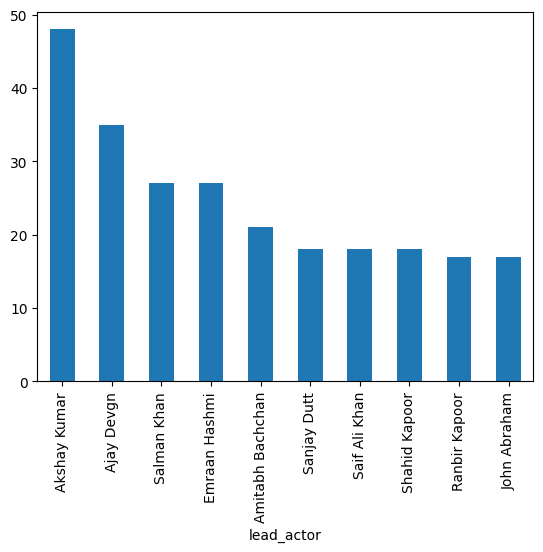

In [ ]:
movies.value_counts().head(10).plot(kind = 'bar')

<Axes: ylabel='count'>

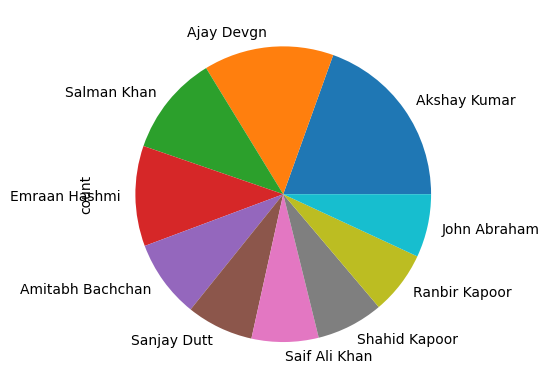

In [ ]:
movies.value_counts().head(10).plot(kind = 'pie')

In [ ]:
marks.unique()

array([101., 100.])

# *#pandas dataframe*

In [ ]:
# --> tabular data -> single row or column will also called as Series

## creating df

### *-from list*

In [ ]:

# --> using list
student_list = [   # <--we need 2d list
    [100,101,18], #<-- every element is the row
    [110,102,20],
    [120,102,22],
    [120,102,22]
]
column_head = ['iq','marks','package']
index_head = ['A','B','C','D']
student_data1 = pd.DataFrame(student_list,columns=column_head,index=index_head,dtype='float64')
student_data1

,iq,marks,package
A,100.0,101.0,18.0
B,110.0,102.0,20.0
C,120.0,102.0,22.0
D,120.0,102.0,22.0


### *-from dict*

In [ ]:
# using dict
student_dict = {
    'iq' : [100,110,120],  # <--- all array should be of same length
    'marks' : [100,101,102],
    'package': [16,18,20]
}
student_data = pd.DataFrame(student_dict)
student_data # <-- automatically takes keys as columns

,iq,marks,package
0,100,100,16
1,110,101,18
2,120,102,20


### *-using read.csv*

In [ ]:
# using read_csv

movies = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/DataFrame/movies.csv')
ipl = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/DataFrame/ipl-matches.csv')
batsman = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/DataFrame/batsman_runs_ipl.csv')

## *DatFrame attributes*



1.   **.shape** #--> returns (rows,columns)
2.   **.dtypes** #--> gets series with i - col & v - type
3.   **.index**/**.column**
4.   **.values** #--> return in 2D numpy array

In [ ]:
movies.shape # (rows,columns)

(1629, 18)

In [ ]:
movies.dtypes # <-- gets the series
ipl.dtypes

,0
ID,int64
City,object
Date,object
Season,object
MatchNumber,object
Team1,object
Team2,object
Venue,object
TossWinner,object
TossDecision,object


In [ ]:
movies.index

RangeIndex(start=0, stop=1629, step=1)

In [ ]:
movies.columns # <--- all the columns that are present
ipl.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [ ]:
student_data.values
ipl.values # <-- multiple values --> therefore getting result in 2D numpy array

array([[1312200, 'Ahmedabad', '2022-05-29', ...,
        "['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'R Tewatia', 'Rashid Khan', 'R Sai Kishore', 'LH Ferguson', 'Yash Dayal', 'Mohammed Shami']",
        'CB Gaffaney', 'Nitin Menon'],
       [1312199, 'Ahmedabad', '2022-05-27', ...,
        "['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Parag', 'R Ashwin', 'TA Boult', 'YS Chahal', 'M Prasidh Krishna', 'OC McCoy']",
        'CB Gaffaney', 'Nitin Menon'],
       [1312198, 'Kolkata', '2022-05-25', ...,
        "['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda', 'MP Stoinis', 'E Lewis', 'KH Pandya', 'PVD Chameera', 'Mohsin Khan', 'Avesh Khan', 'Ravi Bishnoi']",
        'J Madanagopal', 'MA Gough'],
       ...,
       [335984, 'Delhi', '2008-04-19', ...,
        "['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif', 'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne', 'SK Trivedi', 'MM Patel']",
        'Aleem Dar', 'GA Pratapkumar'],
    

## *DataFrame methods*





### *-general and utility methods*

1.   .**head**()/.**tail**()/**sample**()
2.   .**info**() #--> high level information about df
3.   .**describe**() #-->automatically on numerical columns
4.   .**isnull**()
5.   .**duplicated**() #--> duplicate row -> True
6.   .**rename**({old_name:new_name})


In [ ]:
movies.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


In [ ]:
movies.tail(3)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)


In [ ]:
movies.sample()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1000,Woodstock Villa,tt1043876,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Woodstock_Villa,Woodstock Villa,Woodstock Villa,0,2008,\N,Drama|Mystery|Thriller,3.4,370,After a heated public argument between Mumbai-...,A businessman is distraught after refusing to ...,NaN,Sikander Kher|Neha Oberoi|Arbaaz Khan|Gulshan ...,NaN,NaN


In [ ]:
movies.info() # <-- high level info. about df
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           1629 non-null   object 
 1   imdb_id           1629 non-null   object 
 2   poster_path       1526 non-null   object 
 3   wiki_link         1629 non-null   object 
 4   title_y           1629 non-null   object 
 5   original_title    1629 non-null   object 
 6   is_adult          1629 non-null   int64  
 7   year_of_release   1629 non-null   int64  
 8   runtime           1629 non-null   object 
 9   genres            1629 non-null   object 
 10  imdb_rating       1629 non-null   float64
 11  imdb_votes        1629 non-null   int64  
 12  story             1609 non-null   object 
 13  summary           1629 non-null   object 
 14  tagline           557 non-null    object 
 15  actors            1624 non-null   object 
 16  wins_nominations  707 non-null    object 


In [ ]:
movies.describe() # <-- numerical columns automatically

,is_adult,year_of_release,imdb_rating,imdb_votes
count,1629.0,1629.000000,1629.000000,1629.000000
mean,0.0,2010.263966,5.557459,5384.263352
std,0.0,5.381542,1.567609,14552.103231
min,0.0,2001.000000,0.000000,0.000000
25%,0.0,2005.000000,4.400000,233.000000
50%,0.0,2011.000000,5.600000,1000.000000
75%,0.0,2015.000000,6.800000,4287.000000
max,0.0,2019.000000,9.400000,310481.000000


In [ ]:
movies.isnull() # <--- bool dataframe
k = movies.isnull().sum() # --> gives sum


In [ ]:
movies.duplicated() # perticular row --> if duplicated -> true


,0
0,False
1,False
2,False
3,False
4,False
...,...
1624,False
1625,False
1626,False
1627,False


In [ ]:
student_data1.duplicated() # this will give True for last row


,0
A,False
B,False
C,False
D,True


In [ ]:
# rename --> column name rename
print(student_data1)

student_data1.rename(columns={'package':'LPA'}) # inplace = True for permenant change

      iq  marks  package
A  100.0  101.0     18.0
B  110.0  102.0     20.0
C  120.0  102.0     22.0
D  120.0  102.0     22.0


,iq,marks,LPA
A,100.0,101.0,18.0
B,110.0,102.0,20.0
C,120.0,102.0,22.0
D,120.0,102.0,22.0


### *-math methods*

In [ ]:
movies.product(numeric_only=True)

,0
is_adult,0.0
year_of_release,0.0
imdb_rating,0.0
imdb_votes,0.0


In [ ]:
student_data

,iq,marks,package
0,100,100,16
1,110,101,18
2,120,102,20


In [ ]:
student_data.sum() #<--- sums all the colums

,0
iq,330
marks,303
package,54


In [ ]:
student_data.sum(axis=1) # <-- sum by row

,0
0,216
1,229
2,242


In [ ]:
student_data.mean()

,0
iq,110.0
marks,101.0
package,18.0


In [ ]:
# all the mathematical functions applied over here as series

## *indexing and slicing* -> *select and filter*

### *-indexing columns*

In [ ]:
#--> if we select single column --> series
movies['title_x'] # <- this is how we select the columns
print(type(movies['title_x'])) # <-- this will be series

<class 'pandas.core.series.Series'>


In [ ]:
# multiple columns fetch
movies[['title_x','year_of_release','actors']] # <-- this is DataFrame
# --> order is preserved

,title_x,year_of_release,actors
0,Uri: The Surgical Strike,2019,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...
1,Battalion 609,2019,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...
2,The Accidental Prime Minister (film),2019,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...
3,Why Cheat India,2019,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...
4,Evening Shadows,2018,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...
...,...,...,...
1624,Tera Mera Saath Rahen,2001,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...
1625,Yeh Zindagi Ka Safar,2001,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...
1626,Sabse Bada Sukh,2018,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...
1627,Daaka,2019,Gippy Grewal|Zareen Khan|


### *-how to fetch rows*

In [ ]:
student_dict = {
    'name': ['Kunal','Bharat','wagh'],
    'iq' : [100,110,120],  # <--- all array should be of same length
    'marks' : [100,101,102],
    'package': [16,18,20]
}
student_data = pd.DataFrame(student_dict)
student_data.set_index('name',inplace=True) # <-- this will set index as name
student_data

,iq,marks,package
name,,,
Kunal,100,100,16
Bharat,110,101,18
wagh,120,102,20


#### *-- .iloc[rows,colum]*

In [ ]:
# iloc -> searches using index position
movies.iloc[0] # <-- index position
# evey single row or column is series --> here row
# 0th row and col become index and row become value

,0
title_x,Uri: The Surgical Strike
imdb_id,tt8291224
poster_path,https://upload.wikimedia.org/wikipedia/en/thum...
wiki_link,https://en.wikipedia.org/wiki/Uri:_The_Surgica...
title_y,Uri: The Surgical Strike
original_title,Uri: The Surgical Strike
is_adult,0
year_of_release,2019
runtime,138
genres,Action|Drama|War


In [ ]:
# multiple fetching using iloc
movies[0:5:3] # start:end:jump

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)


In [ ]:
movies.iloc[[0,4,5]] # <-- fancy indexing

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
5,Soni (film),tt6078866,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Soni_(film),Soni,Soni,0,2018,97,Drama,7.2,1595,Soni a young policewoman in Delhi and her su...,While fighting crimes against women in Delhi ...,NaN,Geetika Vidya Ohlyan|Saloni Batra|Vikas Shukla...,3 wins & 5 nominations,18 January 2019 (USA)


#### *-- .loc[row_name,column_name]*

In [ ]:
# loc --> search by index_name -> both ends included

student_data.loc['Kunal':'wagh':2] # both ends included
# in iloc last is not included

,iq,marks,package
name,,,
Kunal,100,100,16
wagh,120,102,20


In [ ]:
# even though we named it mannually it can also take iloc
student_data.iloc[0]

,Kunal
iq,100
marks,100
package,16


### *-indexing both rows and columns*

In [ ]:
# selecting both rows and columns

movies.iloc[0:3,0:3] # <--- index position
movies.loc[0:2,'title_x':'poster_path'] # <--actual names

# there are 2 indexing -> pandas own -> .iloc and defined .loc

,title_x,imdb_id,poster_path
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...
1,Battalion 609,tt9472208,NaN
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...


### *-filtering DataFrame*

In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [ ]:
# all final winner

ipl[ipl['MatchNumber'] == 'Final'].loc[:,['Season','WinningTeam']]
ipl[ipl['MatchNumber'] == 'Final'][['Season','WinningTeam']]

,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020/21,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


In [ ]:
# how many superover finished has occured
super_over_y = ipl['SuperOver'] == 'Y'
ipl[super_over_y].shape[0]

14

In [ ]:
# how many matches MI won in Kolkata
ipl[(ipl['City'] == 'Kolkata') & (ipl['WinningTeam'] =='Mumbai Indians')].shape[0]

10

In [ ]:
# toss winner is match winner in percentage
total = ipl.shape[0]
toss_match_winner = ipl[ipl['TossWinner'] == ipl['WinningTeam']].shape[0]

percentage = (toss_match_winner/total)*100
print(round(percentage,2))

51.47


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           1629 non-null   object 
 1   imdb_id           1629 non-null   object 
 2   poster_path       1526 non-null   object 
 3   wiki_link         1629 non-null   object 
 4   title_y           1629 non-null   object 
 5   original_title    1629 non-null   object 
 6   is_adult          1629 non-null   int64  
 7   year_of_release   1629 non-null   int64  
 8   runtime           1629 non-null   object 
 9   genres            1629 non-null   object 
 10  imdb_rating       1629 non-null   float64
 11  imdb_votes        1629 non-null   int64  
 12  story             1609 non-null   object 
 13  summary           1629 non-null   object 
 14  tagline           557 non-null    object 
 15  actors            1624 non-null   object 
 16  wins_nominations  707 non-null    object 


In [ ]:
# movies with rating higher than 8 and votes > 10000
movies[(movies['imdb_votes']>1000) & (movies['imdb_rating']>8)].shape[0]

53

In [ ]:
# action movies with rating more than 8
movies[(movies['genres'].str.contains('Action')) & (movies['imdb_rating'] >7.5)].shape[0]

33

## *add columns*

### *-from scratch*

In [ ]:
movies['Country'] = 'India'
movies

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,Country
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA),India
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA),India
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India),India
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India),India
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN,India
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA),India


### *-from existing column*

In [ ]:
movies = movies.dropna(subset=['actors'])
# Extract first actor
movies['first_actor'] = movies['actors'].str.split('|').str[0]
movies['first_actor'
]

/tmp/ipython-input-519287397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['first_actor'] = movies['actors'].str.split('|').str[0]


,first_actor
0,Vicky Kaushal
1,Vicky Ahuja
2,Anupam Kher
3,Emraan Hashmi
4,Mona Ambegaonkar
...,...
1624,Ajay Devgn
1625,Ameesha Patel
1626,Vijay Arora
1627,Gippy Grewal


## *important DataFrame methods*


In [ ]:
#-------------------------------------------------------------------------------
# .astype(data_type)
#-------------------------------------------------------------------------------

In [ ]:
# .astype() - use to optimize data -> reduce memory footprint
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [ ]:
ipl['ID'] = ipl['ID'].astype('int32')
ipl['Margin'] = ipl['Margin'].astype('float32')
ipl['Team1'] = ipl['Team1'].astype('category') # <-- pandas dtype
ipl['Team2'] = ipl['Team2'].astype('category')
ipl['TossWinner'] = ipl['TossWinner'].astype('category')

In [ ]:
k = pd.Series([1,3,4,5])
k.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4 entries, 0 to 3
Series name: None
Non-Null Count  Dtype
--------------  -----
4 non-null      int64
dtypes: int64(1)
memory usage: 164.0 bytes


In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               950 non-null    int32   
 1   City             899 non-null    object  
 2   Date             950 non-null    object  
 3   Season           950 non-null    object  
 4   MatchNumber      950 non-null    object  
 5   Team1            950 non-null    category
 6   Team2            950 non-null    category
 7   Venue            950 non-null    object  
 8   TossWinner       950 non-null    category
 9   TossDecision     950 non-null    object  
 10  SuperOver        946 non-null    object  
 11  WinningTeam      946 non-null    object  
 12  WonBy            950 non-null    object  
 13  Margin           932 non-null    float32 
 14  method           19 non-null     object  
 15  Player_of_Match  946 non-null    object  
 16  Team1Players     950 non-null    object  
 1

In [ ]:
#-------------------------------------------------------------------------------
# value_counts()  #---> works on both Series and DataFrame
#-------------------------------------------------------------------------------
# use_cases =

In [ ]:
# value_counts()  #---> both
student_list = [
    [100,101,18],
    [110,102,20],
    [120,102,22],
    [120,102,22],
    [120,102,22]
]
column_head = ['iq','marks','package']
index_head = ['A','B','C','D','E']
student_data1 = pd.DataFrame(student_list,columns=column_head,index=index_head,dtype='float64')
student_data1

,iq,marks,package
A,100.0,101.0,18.0
B,110.0,102.0,20.0
C,120.0,102.0,22.0
D,120.0,102.0,22.0
E,120.0,102.0,22.0


In [ ]:
student_data1.value_counts() # checks frequency count of row
# --> mostly used in series

,,,count
iq,marks,package,
120.0,102.0,22.0,3
100.0,101.0,18.0,1
110.0,102.0,20.0,1


In [ ]:
# players which has most man of the match in final and qualifier
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

,count
Player_of_Match,
F du Plessis,3
SK Raina,3
KA Pollard,3
JJ Bumrah,2
AB de Villiers,2
MK Pandey,2
M Vijay,2
A Kumble,2
YK Pathan,2


<Axes: ylabel='count'>

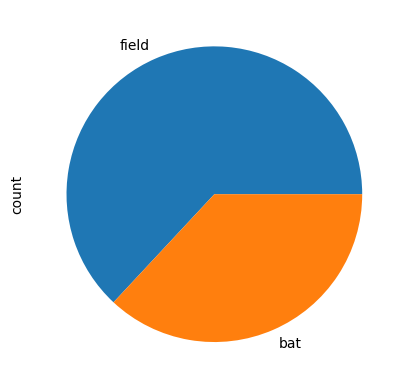

In [ ]:
# toss win -> pie of bat or bowl
ipl['TossDecision'].value_counts().plot(kind='pie')

In [ ]:
# how many matches each team has played #--> index should match
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts()).sort_values(ascending=False)

,count
Mumbai Indians,231
Royal Challengers Bangalore,226
Kolkata Knight Riders,223
Chennai Super Kings,208
Rajasthan Royals,192
Kings XI Punjab,190
Delhi Daredevils,161
Sunrisers Hyderabad,152
Deccan Chargers,75
Delhi Capitals,63


In [ ]:
#-------------------------------------------------------------------------------
# .sort_values(ascending = True/False)  --> works on both Series and DataFrame
#-------------------------------------------------------------------------------


In [ ]:
# based on single column -->
movies.sort_values(['title_x'],ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,Country,first_actor
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India),India,Karisma Kapoor
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN,India,Meghan Jadhav
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India),India,Darsheel Safary
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India),India,Mithun Chakraborty
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India),India,Hrithik Roshan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India),India,Manoj Bajpayee
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India),India,Vicky Ahuja
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA),India,Sharman Joshi
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India),India,Rajniesh Duggall


In [ ]:
students = pd.DataFrame({
    'name': ['nitish', 'ankit', 'rupesh', np.nan, 'mrityunjay', np.nan, 'rishabh', np.nan, 'aditya', np.nan],
    'college': ['bit', 'iit', 'vit', np.nan, 'vlsi', 'ssit', np.nan, np.nan, 'git', np.nan],
    'branch': ['eee', 'it', 'cse', np.nan, 'me', 'ce', 'civ', 'cse', 'bio', np.nan],
    'cgpa': [6.66, 8.25, 6.41, np.nan, 5.6, 9.0, 7.4, 10, 7.4, np.nan],
    'package': [4, 5, 6, np.nan, 6, 7, 8, 9, np.nan, np.nan]
})
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,vlsi,me,5.60,6.0
5,NaN,ssit,ce,9.00,7.0
6,rishabh,NaN,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,git,bio,7.40,NaN
9,NaN,NaN,NaN,NaN,NaN


In [ ]:
# sorting when NaN is there -->
students.sort_values('name') #-> missing values goes down
students.sort_values('name',na_position= 'first') # default - last
# permenant changes -> inplace = True

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,ssit,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,NaN,NaN,NaN,NaN
8,aditya,git,bio,7.40,NaN
1,ankit,iit,it,8.25,5.0
4,mrityunjay,vlsi,me,5.60,6.0
0,nitish,bit,eee,6.66,4.0
6,rishabh,NaN,civ,7.40,8.0
2,rupesh,vit,cse,6.41,6.0


In [ ]:
# sorting based on multiple columns
# --> year of release and then sorting by title
movies.sort_values(['year_of_release','title_x'],ascending=[True,False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,Country,first_actor
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India),India,Karisma Kapoor
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India),India,Ameesha Patel
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India),India,Sunil Shetty
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India),India,Ajay Devgn
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India),India,Jackie Shroff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA),India,Ayushmann Khurrana
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA),India,Diljit Dosanjh
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India),India,Ali Asgar
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India),India,Mana

In [ ]:
#-------------------------------------------------------------------------------
# rank()  ---> works on only series
#-------------------------------------------------------------------------------
# can use sort_values as well !

In [ ]:
batsman['batting_rank'] = batsman['batsman_run'].rank(ascending=False)# by default ascending -> low is more
batsman.sort_values('batting_rank') # equal rank for same runs

,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
570,V Pratap Singh,0,594.0
63,Abdur Razzak,0,594.0
562,U Kaul,0,594.0
65,Akash Deep,0,594.0


In [ ]:
#-------------------------------------------------------------------------------
# sort_index()   #---> works on both
#-------------------------------------------------------------------------------

In [ ]:
movies.sort_index(ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,Country,first_actor
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012),India,Fawad Khan
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA),India,Gippy Grewal
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN,India,Vijay Arora
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India),India,Ameesha Patel
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India),India,Ajay Devgn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),India,Mona Ambegaonkar
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA),India,Emraan Hashmi
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA),India,Anupam Kher
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India,Vicky Ahuja


In [ ]:
#-------------------------------------------------------------------------------
# set_index  # ---> works only on DataFrame
#-------------------------------------------------------------------------------
# sometimes want to make some column as index

In [ ]:
batsman.set_index('batter',inplace=True)
batsman

,batsman_run,batting_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


In [ ]:
#-------------------------------------------------------------------------------
# reset_index  # --> works both on series and DataFrame
#-------------------------------------------------------------------------------

In [ ]:
batsman.reset_index('batter',inplace=True)
batsman # <-- if we set it again with other column the old index gets deleted

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


In [ ]:
# replace index without losing the column
batsman.reset_index().set_index('batsman_run')
# we first reset and then set

,index,batter,batting_rank
batsman_run,,,
280,0,A Ashish Reddy,166.5
161,1,A Badoni,226.0
4,2,A Chandila,535.0
53,3,A Chopra,329.0
25,4,A Choudhary,402.5
...,...,...,...
0,600,Yash Dayal,594.0
47,601,Yashpal Singh,343.0
3,602,Younis Khan,547.5


In [ ]:
# we can apply it on series as well
marks.reset_index() # ---> it becomes DataFrame

,index,Kunal
0,Math,101.0
1,Stat,101.0
2,AI,100.0
3,ML,101.0
4,Algo,101.0


In [ ]:
#-------------------------------------------------------------------------------
# .rename()   #---> only DataFrame
#-------------------------------------------------------------------------------


In [ ]:
movies.set_index('title_x',inplace = True)

In [ ]:
movies.rename(columns={'imdb_id':'imdb'}) # can rename columns

,imdb,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,Country,first_actor
title_x,,,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India,Vicky Kaushal
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India,Vicky Ahuja
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA),India,Anupam Kher
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA),India,Emraan Hashmi
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),India,Mona Ambegaonkar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India),India,Ajay Devgn
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India),India,Ameesha Patel
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN,India,Vijay Arora


In [ ]:
movies.rename(index ={'Uri: The Surgical Strike' : 'URI'},inplace=True)

/tmp/ipython-input-343420738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.rename(index ={'Uri: The Surgical Strike' : 'URI'},inplace=True)


In [ ]:
movies

,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,Country,first_actor
title_x,,,,,,,,,,,,,,,,,,,
URI,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India,Vicky Kaushal
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India,Vicky Ahuja
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA),India,Anupam Kher
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA),India,Emraan Hashmi
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),India,Mona Ambegaonkar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India),India,Ajay Devgn
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India),India,Ameesha Patel
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN,India,Vijay Arora


In [ ]:
#-------------------------------------------------------------------------------
# .unique() #-->works only on series
#-------------------------------------------------------------------------------


In [ ]:
ipl['Season'].unique()

array(['2022', '2021', '2020/21', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2009/10', '2009', '2007/08'],
      dtype=object)

In [ ]:
# number of unique values
students['name'].unique() # will calculate Nan
students['name'].nunique() # gives number of unique -> but dosen;t count Nan

6

In [ ]:
#-------------------------------------------------------------------------------
# .isnull()/.notnull() --> reverse # works on both  / .hasnans -> not on df
#-------------------------------------------------------------------------------

In [ ]:
#series
print(students['name'].isnull())
print(students['name'].notnull()) # ---> opposite of isnull()
print(students['name'].hasnans) # -> tells if column has missing value or not

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7     True
8    False
9     True
Name: name, dtype: bool
0     True
1     True
2     True
3    False
4     True
5    False
6     True
7    False
8     True
9    False
Name: name, dtype: bool
True


In [ ]:
students.isnull() # <--- applies on each value in dataframe

,name,college,branch,cgpa,package
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,True,True,True,True,True
4,False,False,False,False,False
5,True,False,False,False,False
6,False,True,False,False,False
7,True,True,False,False,False
8,False,False,False,False,True
9,True,True,True,True,True


In [ ]:
#-------------------------------------------------------------------------------
# .dropna() # <-- works on both
#-------------------------------------------------------------------------------

In [ ]:
students.dropna() # if in any row there is one missing then all removed

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,vlsi,me,5.60,6.0


In [ ]:
# remove if only all values are null
students.dropna(how='all') # default  how = 'any'

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,vlsi,me,5.60,6.0
5,NaN,ssit,ce,9.00,7.0
6,rishabh,NaN,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,git,bio,7.40,NaN


In [ ]:
# remove rows if null in specific column
students.dropna(subset='name')

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,vlsi,me,5.60,6.0
6,rishabh,NaN,civ,7.40,8.0
8,aditya,git,bio,7.40,NaN


In [ ]:
# name or college missing
students.dropna(subset=['name','college'])

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,vlsi,me,5.60,6.0
8,aditya,git,bio,7.40,NaN


In [ ]:
#-------------------------------------------------------------------------------
# .fillna() # <-- works on both
#-------------------------------------------------------------------------------

In [ ]:
students['name'].fillna('unknown')

,name
0,nitish
1,ankit
2,rupesh
3,unknown
4,mrityunjay
5,unknown
6,rishabh
7,unknown
8,aditya
9,unknown


In [ ]:
students.fillna(0) # can fill all tha missing value with 0
# --> it is advised to take it on column by column basis
# --> single value will not make sense on all the elements

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,0,0,0,0.00,0.0
4,mrityunjay,vlsi,me,5.60,6.0
5,0,ssit,ce,9.00,7.0
6,rishabh,0,civ,7.40,8.0
7,0,0,cse,10.00,9.0
8,aditya,git,bio,7.40,0.0
9,0,0,0,0.00,0.0


In [ ]:
students['package'].fillna(students['package'].mean())

,package
0,4.000000
1,5.000000
2,6.000000
3,6.428571
4,6.000000
5,7.000000
6,8.000000
7,9.000000
8,6.428571
9,6.428571


In [ ]:
# we can use forward fill or backword fill

#students['name'].fillna(method='ffill')
students['name'].ffill()

,name
0,nitish
1,ankit
2,rupesh
3,rupesh
4,mrityunjay
5,mrityunjay
6,rishabh
7,rishabh
8,aditya
9,aditya


In [ ]:
#-------------------------------------------------------------------------------
# drop_duplicates --> works on both
#-------------------------------------------------------------------------------

In [ ]:
student_data1['iq'].drop_duplicates() # takes 1st occurrance

,iq
A,100.0
B,110.0
C,120.0


In [ ]:
student_data1.drop_duplicates(keep='last') # keeps last element

,iq,marks,package
A,100.0,101.0,18.0
B,110.0,102.0,20.0
E,120.0,102.0,22.0


In [ ]:
# find the last ipl match played by virat in delhi

In [ ]:
ipl.sort_index(inplace=True,ascending=False)
m1 = ipl['Team1Players'].str.contains('V Kohli')
m2 = ipl['Team2Players'].str.contains('V Kohli')

ipl[m1|m2].drop_duplicates(subset = 'City',keep='last')[ipl['City'] =='Delhi']

/tmp/ipython-input-1743120681.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ipl[m1|m2].drop_duplicates(subset = 'City',keep='last')[ipl['City'] =='Delhi']


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,N,Delhi Capitals,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan


In [ ]:
#-------------------------------------------------------------------------------
# .drop() --> works on both --> drops row
#-------------------------------------------------------------------------------

In [ ]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,vlsi,me,5.60,6.0
5,NaN,ssit,ce,9.00,7.0
6,rishabh,NaN,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,git,bio,7.40,NaN
9,NaN,NaN,NaN,NaN,NaN


In [ ]:
students.drop(columns=['branch','cgpa']) # -> dropping columns

,name,college,package
0,nitish,bit,4.0
1,ankit,iit,5.0
2,rupesh,vit,6.0
3,NaN,NaN,NaN
4,mrityunjay,vlsi,6.0
5,NaN,ssit,7.0
6,rishabh,NaN,8.0
7,NaN,NaN,9.0
8,aditya,git,NaN
9,NaN,NaN,NaN


In [ ]:
students.drop(index=[0,2]) # works with labelled index -> need to put values

,name,college,branch,cgpa,package
1,ankit,iit,it,8.25,5.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,vlsi,me,5.60,6.0
5,NaN,ssit,ce,9.00,7.0
6,rishabh,NaN,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,git,bio,7.40,NaN
9,NaN,NaN,NaN,NaN,NaN


In [ ]:
#-------------------------------------------------------------------------------
# .apply() # <--- works with both
#-------------------------------------------------------------------------------

In [ ]:
# Series -> row by row operation

temp = pd.Series([1,2,3,3])
def sigmoid(num):
  return 1/1+np.exp(-num)

temp.apply(sigmoid)

,0
0,1.367879
1,1.135335
2,1.049787
3,1.049787


In [ ]:
import pandas as pd

points_df = pd.DataFrame(
    {
        '1st point': [(3, 4), (-6, 5), (0, 0), (-10, 1), (4, 5)],
        '2nd point': [(-3, 4), (0, 0), (2, 2), (10, 10), (1, 1)]
    }
)

points_df

,1st point,2nd point
0,"(3, 4)","(-3, 4)"
1,"(-6, 5)","(0, 0)"
2,"(0, 0)","(2, 2)"
3,"(-10, 1)","(10, 10)"
4,"(4, 5)","(1, 1)"


In [ ]:
# series --> column traverse

# we can apply row wise transverse

def euclidean(row):
    pt_A = row['1st point'] # <--- data enters like a series for axis 1
    pt_B = row['2nd point'] #
    return ((pt_A[0] - pt_B[0])**2 + (pt_A[1] - pt_B[1])**2)**0.5

# point1    (0, 0) # this is how data enters in function
# point2    (3, 4)
points_df['distance'] = points_df.apply(euclidean, axis=1)
points_df


,1st point,2nd point,distance
0,"(3, 4)","(-3, 4)",6.000000
1,"(-6, 5)","(0, 0)",7.810250
2,"(0, 0)","(2, 2)",2.828427
3,"(-10, 1)","(10, 10)",21.931712
4,"(4, 5)","(1, 1)",5.000000


In [ ]:
# -->check what is pd.NA # .get()

In [ ]:
#-------------------------------------------------------------------------------
#
#-------------------------------------------------------------------------------

# *#groupby in pandas*

### *database connection*

In [ ]:
import pandas as pd
import numpy as np
movies = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/DataFrame/imdb-top-1000.csv')

### head

In [ ]:
# you form groups based on perticular column
# --> always on categorical column
movies.head()


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0


In [ ]:
genres = movies.groupby('Genre') # <-- groupby object

genres # -> this will be grouped based on specified column

# it basically creates a dataframe per column value
# colume_value1  + dataframe with column value
for column_value, dataframe in genres:
  print(column_value)
  print(dataframe)

Action
                                          Series_Title Released_Year  Runtime  \
2                                      The Dark Knight          2008      152   
5        The Lord of the Rings: The Return of the King          2003      201   
8                                            Inception          2010      148   
10   The Lord of the Rings: The Fellowship of the Ring          2001      178   
13               The Lord of the Rings: The Two Towers          2002      179   
..                                                 ...           ...      ...   
968                                       Falling Down          1993      113   
979                                      Lethal Weapon          1987      109   
982                                          Mad Max 2          1981       96   
983                                       The Warriors          1979       92   
985                               Escape from Alcatraz          1979      112   

      Genre  IMDB_Ra

In [ ]:
# apply aggregation functions on groupby object
# any mathematical functions -->
print(genres.mean(numeric_only=True)) # numeric only is part of mean function

              Runtime  IMDB_Rating    No_of_Votes         Gross  Metascore
Genre                                                                     
Action     129.046512     7.949419  420246.581395  1.897224e+08  73.419580
Adventure  134.111111     7.937500  313557.819444  1.319017e+08  78.437500
Animation   99.585366     7.930488  268032.073171  1.784326e+08  81.093333
Biography  136.022727     7.938636  272805.045455  9.404952e+07  76.240506
Comedy     112.129032     7.901290  178195.658065  1.010572e+08  78.720000
Crime      126.392523     8.016822  313398.271028  7.899656e+07  77.080460
Drama      124.737024     7.957439  212343.612457  1.225259e+08  79.701245
Family     107.500000     7.800000  275610.500000  2.195553e+08  79.000000
Fantasy     85.000000     8.000000   73111.000000  3.913633e+08        NaN
Film-Noir  104.000000     7.966667  122405.000000  4.197018e+07  95.666667
Horror     102.090909     7.909091  340232.363636  9.405902e+07  80.000000
Mystery    119.083333    

In [ ]:
# find top 3 genres

movies.groupby('Genre').sum(numeric_only=True)['Gross'].sort_values(ascending=False).head(3)

,Gross
Genre,
Drama,3.540997e+10
Action,3.263226e+10
Comedy,1.566387e+10


In [ ]:
movies.groupby('Genre')['Gross'].sum().sort_values(ascending=False).head(3) # <-- fast way
# above summing first

,Gross
Genre,
Drama,3.540997e+10
Action,3.263226e+10
Comedy,1.566387e+10


In [ ]:
# Hightest avg imdb rating
movies.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

,IMDB_Rating
Genre,
Western,8.350000
Crime,8.016822
Fantasy,8.000000
Mystery,7.975000
Film-Noir,7.966667
Drama,7.957439
Action,7.949419
Biography,7.938636
Adventure,7.937500


In [ ]:
# director with most popularity
movies.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False)

,No_of_Votes
Director,
Christopher Nolan,11578345
Quentin Tarantino,8123208
Steven Spielberg,7817166
David Fincher,6607859
Martin Scorsese,6513530
...,...
J. Lee Thompson,26457
Peter Mullan,25938
René Laloux,25229


In [ ]:
# highest rated movie from each genere
movies.groupby('Genre')['IMDB_Rating'].max()

,IMDB_Rating
Genre,
Action,9.0
Adventure,8.6
Animation,8.6
Biography,8.9
Comedy,8.6
Crime,9.2
Drama,9.3
Family,7.8
Fantasy,8.1


In [ ]:
# find number of movies done by each actor

movies['Star1'].value_counts()
movies.groupby('Star1')['Series_Title'].count().sort_values(ascending=False)

#work in 3 steps -
# -> groupby(perticular_column)[desired_column].aggeregate_operation()

,Series_Title
Star1,
Tom Hanks,12
Robert De Niro,11
Clint Eastwood,10
Al Pacino,10
Leonardo DiCaprio,9
...,...
Gérard Jugnot,1
Günes Sensoy,1
Haluk Bilginer,1


## groupby -> attributes and methods

In [ ]:
genre = movies.groupby('Genre')

In [ ]:
# calculate number of groups
len(movies.groupby('Genre'))
# alternative approch
movies['Genre'].nunique()

14

In [ ]:
# every group has how many rows
movies.groupby('Genre').size() #.sort_values(ascending=False) # <-- sorts by index

# #alternative approch
# movies['Genre'].value_counts() # <-- sorted based on value

,0
Genre,
Action,172
Adventure,72
Animation,82
Biography,88
Comedy,155
Crime,107
Drama,289
Family,2
Fantasy,2


In [ ]:
# first item of any group
genre.first()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,The Dark Knight,2008,152,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
Adventure,Interstellar,2014,169,8.6,Christopher Nolan,Matthew McConaughey,1512360,188020017.0,74.0
Animation,Sen to Chihiro no kamikakushi,2001,125,8.6,Hayao Miyazaki,Daveigh Chase,651376,10055859.0,96.0
Biography,Schindler's List,1993,195,8.9,Steven Spielberg,Liam Neeson,1213505,96898818.0,94.0
Comedy,Gisaengchung,2019,132,8.6,Bong Joon Ho,Kang-ho Song,552778,53367844.0,96.0
Crime,The Godfather,1972,175,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
Drama,The Shawshank Redemption,1994,142,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
Family,E.T. the Extra-Terrestrial,1982,115,7.8,Steven Spielberg,Henry Thomas,372490,435110554.0,91.0
Fantasy,Das Cabinet des Dr. Caligari,1920,76,8.1,Robert Wiene,Werner Krauss,57428,337574718.0,NaN


In [ ]:
genre.last()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,Escape from Alcatraz,1979,112,7.6,Don Siegel,Clint Eastwood,121731,43000000.0,76.0
Adventure,Kelly's Heroes,1970,144,7.6,Brian G. Hutton,Clint Eastwood,45338,1378435.0,50.0
Animation,The Jungle Book,1967,78,7.6,Wolfgang Reitherman,Phil Harris,166409,141843612.0,65.0
Biography,Midnight Express,1978,121,7.6,Alan Parker,Brad Davis,73662,35000000.0,59.0
Comedy,Breakfast at Tiffany's,1961,115,7.6,Blake Edwards,Audrey Hepburn,166544,679874270.0,76.0
Crime,The 39 Steps,1935,86,7.6,Alfred Hitchcock,Robert Donat,51853,302787539.0,93.0
Drama,Lifeboat,1944,97,7.6,Alfred Hitchcock,Tallulah Bankhead,26471,852142728.0,78.0
Family,Willy Wonka & the Chocolate Factory,1971,100,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0
Fantasy,Nosferatu,1922,94,7.9,F.W. Murnau,Max Schreck,88794,445151978.0,NaN


In [ ]:
genre.nth(6) # 6th movie of each group

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
16,Star Wars: Episode V - The Empire Strikes Back,1980,124,Action,8.7,Irvin Kershner,Mark Hamill,1159315,290475067.0,82.0
27,Se7en,1995,127,Crime,8.6,David Fincher,Morgan Freeman,1445096,100125643.0,65.0
32,It's a Wonderful Life,1946,130,Drama,8.6,Frank Capra,James Stewart,405801,82385199.0,89.0
66,WALL·E,2008,98,Animation,8.4,Andrew Stanton,Ben Burtt,999790,223808164.0,95.0
83,The Great Dictator,1940,125,Comedy,8.4,Charles Chaplin,Charles Chaplin,203150,288475.0,NaN
102,Braveheart,1995,178,Biography,8.3,Mel Gibson,Mel Gibson,959181,75600000.0,68.0
118,North by Northwest,1959,136,Adventure,8.3,Alfred Hitchcock,Cary Grant,299198,13275000.0,98.0
420,Sleuth,1972,138,Mystery,8.0,Joseph L. Mankiewicz,Laurence Olivier,44748,4081254.0,NaN
724,Get Out,2017,104,Horror,7.7,Jordan Peele,Daniel Kaluuya,492851,176040665.0,85.0


In [ ]:
# get the perticular group and see all entries
genre.get_group('Horror') # <--- gets data frame

# # we can do it via bool indexing
# movies[movies['Genre'] == 'Horror'] # -> but above is fast since it alrady forms group


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
49,Psycho,1960,109,Horror,8.5,Alfred Hitchcock,Anthony Perkins,604211,32000000.0,97.0
75,Alien,1979,117,Horror,8.4,Ridley Scott,Sigourney Weaver,787806,78900000.0,89.0
271,The Thing,1982,109,Horror,8.1,John Carpenter,Kurt Russell,371271,13782838.0,57.0
419,The Exorcist,1973,122,Horror,8.0,William Friedkin,Ellen Burstyn,362393,232906145.0,81.0
544,Night of the Living Dead,1968,96,Horror,7.9,George A. Romero,Duane Jones,116557,89029.0,89.0
707,The Innocents,1961,100,Horror,7.8,Jack Clayton,Deborah Kerr,27007,2616000.0,88.0
724,Get Out,2017,104,Horror,7.7,Jordan Peele,Daniel Kaluuya,492851,176040665.0,85.0
844,Halloween,1978,91,Horror,7.7,John Carpenter,Donald Pleasence,233106,47000000.0,87.0
876,The Invisible Man,1933,71,Horror,7.7,James Whale,Claude Rains,30683,298791505.0,87.0
932,Saw,2004,103,Horror,7.6,James Wan,Cary Elwes,379020,56000369.0,46.0


In [ ]:
# groups
genre.groups # --> dict Groups : [list_of_index of all releted ]

{'Action': [2, 5, 8, 10, 13, 14, 16, 29, 30, 31, 39, 42, 44, 55, 57, 59, 60, 63, 68, 72, 106, 109, 129, 130, 134, 140, 142, 144, 152, 155, 160, 161, 166, 168, 171, 172, 177, 181, 194, 201, 202, 216, 217, 223, 224, 236, 241, 262, 275, 294, 308, 320, 325, 326, 331, 337, 339, 340, 343, 345, 348, 351, 353, 356, 357, 362, 368, 369, 375, 376, 390, 410, 431, 436, 473, 477, 479, 482, 488, 493, 496, 502, 507, 511, 532, 535, 540, 543, 564, 569, 570, 573, 577, 582, 583, 602, 605, 608, 615, 623, ...], 'Adventure': [21, 47, 93, 110, 114, 116, 118, 137, 178, 179, 191, 193, 209, 226, 231, 247, 267, 273, 281, 300, 301, 304, 306, 323, 329, 361, 366, 377, 402, 406, 415, 426, 458, 470, 497, 498, 506, 513, 514, 537, 549, 552, 553, 566, 576, 604, 609, 618, 638, 647, 675, 681, 686, 692, 711, 713, 739, 755, 781, 797, 798, 851, 873, 884, 912, 919, 947, 957, 964, 966, 984, 991], 'Animation': [23, 43, 46, 56, 58, 61, 66, 70, 101, 135, 146, 151, 158, 170, 197, 205, 211, 213, 219, 229, 230, 242, 245, 246, 270, 33

In [ ]:
genre.describe() # study based on all numeric

Runtime                                                              \
            count        mean        std    min     25%    50%     75%    max   
Genre                                                                           
Action      172.0  129.046512  28.500706   45.0  110.75  127.5  143.25  321.0   
Adventure    72.0  134.111111  33.317320   88.0  109.00  127.0  149.00  228.0   
Animation    82.0   99.585366  14.530471   71.0   90.00   99.5  106.75  137.0   
Biography    88.0  136.022727  25.514466   93.0  120.00  129.0  146.25  209.0   
Comedy      155.0  112.129032  22.946213   68.0   96.00  106.0  124.50  188.0   
Crime       107.0  126.392523  27.689231   80.0  106.50  122.0  141.50  229.0   
Drama       289.0  124.737024  27.740490   64.0  105.00  121.0  137.00  242.0   
Family        2.0  107.500000  10.606602  100.0  103.75  107.5  111.25  115.0   
Fantasy       2.0   85.000000  12.727922   76.0   80.50   85.0   89.50   94.0   
Film-Noir     3.0  104.000000   4.000000  100.0  102.00  104.0  106.00  108.0   
Horror       11.0  102.090909  13.604812   71.0   98.00  103.0  109.00  122.0   
Mystery      12.0  119.083333  14.475423   96.0  110.75  117.5  130.25  138.0   
Thriller      1.0  108.000000        NaN  108.0  108.00  108.0  108.00  108.0   
Western       4.0  148.250000  17.153717  132.0  134.25  148.0  162.00  165.0   

          IMDB_Rating            ...         Gross              Metascore  \
                count      mean  ...           75%          max     count   
Genre                            ...                                        
Action          172.0  7.949419  ...  2.674437e+08  936662225.0     143.0   
Adventure        72.0  7.937500  ...  1.998070e+08  874211619.0      64.0   
Animation        82.0  7.930488  ...  2.520612e+08  873839108.0      75.0   
Biography        88.0  7.938636  ...  9.829924e+07  753585104.0      79.0   
Comedy          155.0  7.901290  ...  8.107809e+07  886752933.0     125.0   
Crime           107.0  8.016822  ...  7.102163e+07  790482117.0      87.0   
Drama           289.0  7.957439  ...  1.164461e+08  924558264.0     241.0   
Family            2.0  7.800000  ...  3.273329e+08  435110554.0       2.0   
Fantasy           2.0  8.000000  ...  4.182577e+08  445151978.0       0.0   
Film-Noir         3.0  7.966667  ...  6.273068e+07  123353292.0       3.0   
Horror           11.0  7.909091  ...  1.362817e+08  298791505.0      11.0   
Mystery          12.0  7.975000  ...  1.310949e+08  474203697.0       8.0   
Thriller          1.0  7.800000  ...  1.755074e+07   17550741.0       1.0   
Western           4.0  8.350000  ...  1.920000e+07   31800000.0       4.0   

                                                                  
                mean        std   min    25%   50%    75%    max  
Genre                                                             
Action     73.419580  12.421252  33.0  65.00  74.0  82.00   98.0  
Adventure  78.437500  12.345393  41.0  69.75  80.5  87.25  100.0  
Animation  81.093333   8.813646  61.0  75.00  82.0  87.50   96.0  
Biography  76.240506  11.028187  48.0  70.50  76.0  84.50   97.0  
Comedy     78.720000  11.829160  45.0  72.00  79.0  88.00   99.0  
Crime      77.080460  13.099102  47.0  69.50  77.0  87.00  100.0  
Drama      79.701245  12.744687  28.0  72.00  82.0  89.00  100.0  
Family     79.000000  16.970563  67.0  73.00  79.0  85.00   91.0  
Fantasy          NaN        NaN   NaN    NaN   NaN    NaN    NaN  
Film-Noir  95.666667   1.527525  94.0  95.00  96.0  96.50   97.0  
Horror     80.000000  15.362291  46.0  77.50  87.0  88.50   97.0  
Mystery    79.125000  18.604435  52.0  65.25  77.0  98.50  100.0  
Thriller   81.000000        NaN  81.0  81.00  81.0  81.00   81.0  
Western    78.250000   9.032349  69.0  72.75  77.0  82.50   90.0  

[14 rows x 40 columns]

In [ ]:
genre.sample(2,replace=True) #--> random movies from each genre
# --> replace, if not exist 2 movies then return one 2 times

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
887,Guardians of the Galaxy Vol. 2,2017,136,Action,7.6,James Gunn,Chris Pratt,569974,389813101.0,67.0
337,Serbuan maut 2: Berandal,2014,150,Action,8.0,Gareth Evans,Iko Uwais,114316,2625803.0,71.0
498,Life of Pi,2012,127,Adventure,7.9,Ang Lee,Suraj Sharma,580708,124987023.0,79.0
273,Fitzcarraldo,1982,158,Adventure,8.1,Werner Herzog,Klaus Kinski,31595,616558047.0,NaN
665,Batman: Mask of the Phantasm,1993,76,Animation,7.8,Kevin Altieri,Boyd Kirkland,43690,5617391.0,NaN
672,Majo no takkyûbin,1989,103,Animation,7.8,Hayao Miyazaki,Kirsten Dunst,124193,58564351.0,83.0
424,Butch Cassidy and the Sundance Kid,1969,110,Biography,8.0,George Roy Hill,Paul Newman,201888,102308889.0,66.0
542,Patton,1970,172,Biography,7.9,Franklin J. Schaffner,George C. Scott,93741,61700000.0,91.0
311,The Shop Around the Corner,1940,99,Comedy,8.1,Ernst Lubitsch,Margaret Sullavan,28450,203300.0,96.0
687,The King of Comedy,1982,109,Comedy,7.8,Martin Scorsese,Robert De Niro,88511,2500000.0,73.0


In [ ]:
genre.nunique() #--> unique movies of each column

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,172,61,78,15,123,121,172,172,50
Adventure,72,49,58,10,59,59,72,72,33
Animation,82,35,41,11,51,77,82,82,29
Biography,88,44,56,13,76,72,88,88,40
Comedy,155,72,70,11,113,133,155,155,44
Crime,106,56,65,14,86,85,107,107,39
Drama,289,83,95,14,211,250,288,287,52
Family,2,2,2,1,2,2,2,2,2
Fantasy,2,2,2,2,2,2,2,2,0


### multiple operations on groupby

In [ ]:
genres = movies.groupby('Genre')

In [ ]:
genre['Runtime'].agg(['sum','max','min'])

,sum,max,min
Genre,,,
Action,22196,321,45
Adventure,9656,228,88
Animation,8166,137,71
Biography,11970,209,93
Comedy,17380,188,68
Crime,13524,229,80
Drama,36049,242,64
Family,215,115,100
Fantasy,170,94,76


In [ ]:
# multiple operations on groupby -- by providing dict ->ag
genres.agg({
    'Runtime':['mean','max'],
    'IMDB_Rating' : 'mean',
    'No_of_Votes' : 'sum',
    'Gross' : 'sum',
    'Metascore' : 'min'
})

Runtime      IMDB_Rating No_of_Votes         Gross Metascore
                 mean  max        mean         sum           sum       min
Genre                                                                     
Action     129.046512  321    7.949419    72282412  3.263226e+10      33.0
Adventure  134.111111  228    7.937500    22576163  9.496922e+09      41.0
Animation   99.585366  137    7.930488    21978630  1.463147e+10      61.0
Biography  136.022727  209    7.938636    24006844  8.276358e+09      48.0
Comedy     112.129032  188    7.901290    27620327  1.566387e+10      45.0
Crime      126.392523  229    8.016822    33533615  8.452632e+09      47.0
Drama      124.737024  242    7.957439    61367304  3.540997e+10      28.0
Family     107.500000  115    7.800000      551221  4.391106e+08      67.0
Fantasy     85.000000   94    8.000000      146222  7.827267e+08       NaN
Film-Noir  104.000000  108    7.966667      367215  1.259105e+08      94.0
Horror     102.090909  122    7.909091     3742556  1.034649e+09      46.0
Mystery    119.083333  138    7.975000     4203004  1.256417e+09      52.0
Thriller   108.000000  108    7.800000       27733  1.755074e+07      81.0
Western    148.250000  165    8.350000     1289665  5.822151e+07      69.0

In [ ]:
# looping  --> gets group_name and DataFrame

df = pd.DataFrame(columns=movies.columns) # <-- empty dataframe
for group, data in genres:  # genres is a groupby object: (group, DataFrame)
    max_rating_rows = data[data['IMDB_Rating'] == data['IMDB_Rating'].max()]
    df = pd.concat([df, max_rating_rows], ignore_index=True) # <-- adding it in the empty dataframe

df


/tmp/ipython-input-1492190030.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, max_rating_rows], ignore_index=True)


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
1,Interstellar,2014,169,Adventure,8.6,Christopher Nolan,Matthew McConaughey,1512360,188020017.0,74.0
2,Sen to Chihiro no kamikakushi,2001,125,Animation,8.6,Hayao Miyazaki,Daveigh Chase,651376,10055859.0,96.0
3,Schindler's List,1993,195,Biography,8.9,Steven Spielberg,Liam Neeson,1213505,96898818.0,94.0
4,Gisaengchung,2019,132,Comedy,8.6,Bong Joon Ho,Kang-ho Song,552778,53367844.0,96.0
5,La vita è bella,1997,116,Comedy,8.6,Roberto Benigni,Roberto Benigni,623629,57598247.0,59.0
6,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
7,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
8,E.T. the Extra-Terrestrial,1982,115,Family,7.8,Steven Spielberg,Henry Thomas,372490,435110554.0,91.0
9,Willy Wonka & the Chocolate Factory,1971,100,Family,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0


In [ ]:
# split + apply + combine --> strategy

genres.apply(min) # we can send the custom logic in the apply

/tmp/ipython-input-3797964052.py:3: FutureWarning: The provided callable <built-in function min> is currently using np.minimum.reduce. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.minimum.reduce instead.
  genres.apply(min) # we can send the custom logic in the apply
/tmp/ipython-input-3797964052.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genres.apply(min) # we can send the custom logic in the apply


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,,
Action,300,1924,45,Action,7.6,Abhishek Chaubey,Aamir Khan,25312,3296.0,NaN
Adventure,2001: A Space Odyssey,1925,88,Adventure,7.6,Akira Kurosawa,Aamir Khan,29999,61001.0,NaN
Animation,Akira,1940,71,Animation,7.6,Adam Elliot,Adrian Molina,25229,128985.0,NaN
Biography,12 Years a Slave,1928,93,Biography,7.6,Adam McKay,Adrien Brody,27254,21877.0,NaN
Comedy,(500) Days of Summer,1921,68,Comedy,7.6,Alejandro G. Iñárritu,Aamir Khan,26337,1305.0,NaN
Crime,12 Angry Men,1931,80,Crime,7.6,Akira Kurosawa,Ajay Devgn,27712,6013.0,NaN
Drama,1917,1925,64,Drama,7.6,Aamir Khan,Abhay Deol,25088,3600.0,NaN
Family,E.T. the Extra-Terrestrial,1971,100,Family,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0
Fantasy,Das Cabinet des Dr. Caligari,1920,76,Fantasy,7.9,F.W. Murnau,Max Schreck,57428,337574718.0,NaN


In [ ]:
# Find number of movies starting with A

def fu(group):
  return group['Series_Title'].str.startswith('A').sum() # <-combine


In [ ]:
genres.apply(fu) # apply is sending DataFrames -

/tmp/ipython-input-1424646973.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genres.apply(fu) # apply is sending DataFrames -


,0
Genre,
Action,10
Adventure,2
Animation,2
Biography,9
Comedy,14
Crime,4
Drama,21
Family,0
Fantasy,0


In [ ]:
# find ranking of each movie in the group according to imdb

def ranking_fun(data):
  data['Movie_rank_g'] = data['IMDB_Rating'].rank(ascending=False) # <-- will take each group and add rank
  return data


def custom_rank(data):
  data['custom_rank'] = data['IMDB_Rating'].rank(ascending=False)
  return data

In [ ]:
genres.apply(ranking_fun)

/tmp/ipython-input-3345503510.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genres.apply(ranking_fun)


Series_Title Released_Year  \
Genre                                                                           
Action   2                                      The Dark Knight          2008   
         5        The Lord of the Rings: The Return of the King          2003   
         8                                            Inception          2010   
         10   The Lord of the Rings: The Fellowship of the Ring          2001   
         13               The Lord of the Rings: The Two Towers          2002   
...                                                         ...           ...   
Thriller 700                                    Wait Until Dark          1967   
Western  12                     Il buono, il brutto, il cattivo          1966   
         48                        Once Upon a Time in the West          1968   
         115                         Per qualche dollaro in più          1965   
         691                             The Outlaw Josey Wales          1976   

              Runtime     Genre  IMDB_Rating           Director  \
Genre                                                             
Action   2        152    Action          9.0  Christopher Nolan   
         5        201    Action          8.9      Peter Jackson   
         8        148    Action          8.8  Christopher Nolan   
         10       178    Action          8.8      Peter Jackson   
         13       179    Action          8.7      Peter Jackson   
...               ...       ...          ...                ...   
Thriller 700      108  Thriller          7.8      Terence Young   
Western  12       161   Western          8.8       Sergio Leone   
         48       165   Western          8.5       Sergio Leone   
         115      132   Western          8.3       Sergio Leone   
         691      135   Western          7.8     Clint Eastwood   

                          Star1  No_of_Votes        Gross  Metascore  \
Genre                                                                  
Action   2       Christian Bale      2303232  534858444.0       84.0   
         5          Elijah Wood      1642758  377845905.0       94.0   
         8    Leonardo DiCaprio      2067042  292576195.0       74.0   
         10         Elijah Wood      1661481  315544750.0       92.0   
         13         Elijah Wood      1485555  342551365.0       87.0   
...                         ...          ...          ...        ...   
Thriller 700     Audrey Hepburn        27733   17550741.0       81.0   
Western  12      Clint Eastwood       688390    6100000.0       90.0   
         48         Henry Fonda       302844    5321508.0       80.0   
         115     Clint Eastwood       232772   15000000.0       74.0   
         691     Clint Eastwood        65659   31800000.0       69.0   

              Movie_rank_g  
Genre                       
Action   2             1.0  
         5             2.0  
         8             3.5  
         10            3.5  
         13            6.0  
...                    ...  
Thriller 700           1.0  
Western  12            1.0  
         48            2.0  
         115           3.0  
         691           4.0  

[1000 rows x 11 columns]

In [ ]:
# normalized rating -->
# x' = x - xmin / xmax - xmin -> based on group

def norm(data): # <-- perform operation on dataframe and return dataframe
  Nr = data['IMDB_Rating'] - data['IMDB_Rating'].min()
  Dr = data['IMDB_Rating'].max() - data['IMDB_Rating'].min()
  data['Normalized_rating'] = Nr/Dr
  return data

In [ ]:
genres.apply(norm)

/tmp/ipython-input-340816002.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genres.apply(norm)


Series_Title Released_Year  \
Genre                                                                           
Action   2                                      The Dark Knight          2008   
         5        The Lord of the Rings: The Return of the King          2003   
         8                                            Inception          2010   
         10   The Lord of the Rings: The Fellowship of the Ring          2001   
         13               The Lord of the Rings: The Two Towers          2002   
...                                                         ...           ...   
Thriller 700                                    Wait Until Dark          1967   
Western  12                     Il buono, il brutto, il cattivo          1966   
         48                        Once Upon a Time in the West          1968   
         115                         Per qualche dollaro in più          1965   
         691                             The Outlaw Josey Wales          1976   

              Runtime     Genre  IMDB_Rating           Director  \
Genre                                                             
Action   2        152    Action          9.0  Christopher Nolan   
         5        201    Action          8.9      Peter Jackson   
         8        148    Action          8.8  Christopher Nolan   
         10       178    Action          8.8      Peter Jackson   
         13       179    Action          8.7      Peter Jackson   
...               ...       ...          ...                ...   
Thriller 700      108  Thriller          7.8      Terence Young   
Western  12       161   Western          8.8       Sergio Leone   
         48       165   Western          8.5       Sergio Leone   
         115      132   Western          8.3       Sergio Leone   
         691      135   Western          7.8     Clint Eastwood   

                          Star1  No_of_Votes        Gross  Metascore  \
Genre                                                                  
Action   2       Christian Bale      2303232  534858444.0       84.0   
         5          Elijah Wood      1642758  377845905.0       94.0   
         8    Leonardo DiCaprio      2067042  292576195.0       74.0   
         10         Elijah Wood      1661481  315544750.0       92.0   
         13         Elijah Wood      1485555  342551365.0       87.0   
...                         ...          ...          ...        ...   
Thriller 700     Audrey Hepburn        27733   17550741.0       81.0   
Western  12      Clint Eastwood       688390    6100000.0       90.0   
         48         Henry Fonda       302844    5321508.0       80.0   
         115     Clint Eastwood       232772   15000000.0       74.0   
         691     Clint Eastwood        65659   31800000.0       69.0   

              Normalized_rating  
Genre                            
Action   2             1.000000  
         5             0.928571  
         8             0.857143  
         10            0.857143  
         13            0.785714  
...                         ...  
Thriller 700                NaN  
Western  12            1.000000  
         48            0.700000  
         115           0.500000  
         691           0.000000  

[1000 rows x 11 columns]

In [ ]:
# groupby on multiple columns -> both should be categorical
duo = movies.groupby(['Director','Star1'])

duo.size().sort_values(ascending = False)

Director           Star1          
Akira Kurosawa     Toshirô Mifune     7
Charles Chaplin    Charles Chaplin    6
Joel Coen          Ethan Coen         6
Martin Scorsese    Robert De Niro     6
Christopher Nolan  Christian Bale     4
                                     ..
Hayao Miyazaki     Daveigh Chase      1
                   Hideaki Anno       1
                   Hitoshi Takagi     1
                   Kirsten Dunst      1
Guy Ritchie        Jason Flemyng      1
Length: 898, dtype: int64

In [ ]:
# actor director has earned most money
duo['Gross'].sum().sort_values(ascending=False)

duo.get_group(('Anthony Russo', 'Joe Russo'))

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
59,Avengers: Endgame,2019,181,Action,8.4,Anthony Russo,Joe Russo,809955,858373000.0,78.0
60,Avengers: Infinity War,2018,149,Action,8.4,Anthony Russo,Joe Russo,834477,678815482.0,68.0
583,Captain America: Civil War,2016,147,Action,7.8,Anthony Russo,Joe Russo,663649,408084349.0,75.0
737,Captain America: The Winter Soldier,2014,136,Action,7.7,Anthony Russo,Joe Russo,736182,259766572.0,70.0


In [ ]:
# actor director has earned most money
duo['Gross'].sum().sort_values(ascending=False) # <-- this is multi index series

,,Gross
Director,Star1,
Akira Kurosawa,Toshirô Mifune,2.999877e+09
Anthony Russo,Joe Russo,2.205039e+09
Billy Wilder,William Holden,1.286779e+09
Christopher Nolan,Christian Bale,1.242940e+09
Werner Herzog,Klaus Kinski,1.124605e+09
...,...,...
Jeong-beom Lee,Won Bin,6.460000e+03
Shane Meadows,Paddy Considine,6.013000e+03
Jaco Van Dormael,Jared Leto,3.600000e+03


In [ ]:
# actor genre combo in terms of meta score
movies.groupby(['Star1','Genre'])['Metascore'].mean().reset_index().sort_values('Metascore',ascending=False)

,Star1,Genre,Metascore
606,Peter O'Toole,Adventure,100.0
590,Orson Welles,Drama,100.0
77,Bertil Guve,Drama,100.0
230,Ellar Coltrane,Drama,100.0
329,Humphrey Bogart,Drama,100.0
...,...,...,...
807,William Holden,Drama,NaN
812,Won Bin,Action,NaN
815,Yash,Action,NaN
826,Çetin Tekindor,Drama,NaN


In [ ]:
movies.groupby(['Star1','Genre']).agg(['min','max'])

Series_Title  \
                                                              min   
Star1                Genre                                          
Aamir Khan           Action                       Andaz Apna Apna   
                     Adventure  Lagaan: Once Upon a Time in India   
                     Comedy                              3 Idiots   
Aaron Taylor-Johnson Action                              Kick-Ass   
Abhay Deol           Drama                                  Dev.D   
...                                                           ...   
Zbigniew Zamachowski Comedy                 Trois couleurs: Blanc   
Zooey Deschanel      Comedy                  (500) Days of Summer   
Çetin Tekindor       Drama                         Babam ve Oglum   
Éric Toledano        Biography                   The Intouchables   
Ömer Faruk Sorak     Comedy                             Vizontele   

                                                                   \
                                                              max   
Star1                Genre                                          
Aamir Khan           Action                                Dangal   
                     Adventure  Lagaan: Once Upon a Time in India   
                     Comedy                       Rang De Basanti   
Aaron Taylor-Johnson Action                              Kick-Ass   
Abhay Deol           Drama                                  Dev.D   
...                                                           ...   
Zbigniew Zamachowski Comedy                 Trois couleurs: Blanc   
Zooey Deschanel      Comedy                  (500) Days of Summer   
Çetin Tekindor       Drama                         Babam ve Oglum   
Éric Toledano        Biography                   The Intouchables   
Ömer Faruk Sorak     Comedy                             Vizontele   

                               Released_Year       Runtime      IMDB_Rating  \
                                         min   max     min  max         min   
Star1                Genre                                                    
Aamir Khan           Action             1994  2016     160  161         8.2   
                     Adventure          2001  2001     224  224         8.1   
                     Comedy             2001  2014     153  183         8.1   
Aaron Taylor-Johnson Action             2010  2010     117  117         7.6   
Abhay Deol           Drama              2009  2009     144  144         8.0   
...                                      ...   ...     ...  ...         ...   
Zbigniew Zamachowski Comedy             1994  1994      92   92         7.6   
Zooey Deschanel      Comedy             2009  2009      95   95         7.7   
Çetin Tekindor       Drama              2005  2005     112  112         8.3   
Éric Toledano        Biography          2011  2011     112  112         8.5   
Ömer Faruk Sorak     Comedy             2001  2001     110  110         8.0   

                                                 Director  \
                                max                   min   
Star1                Genre                                  
Aamir Khan           Action     8.4         Nitesh Tiwari   
                     Adventure  8.1    Ashutosh Gowariker   
                     Comedy     8.4         Farhan Akhtar   
Aaron Taylor-Johnson Action     7.6        Matthew Vaughn   
Abhay Deol           Drama      8.0        Anurag Kashyap   
...                             ...                   ...   
Zbigniew Zamachowski Comedy     7.6  Krzysztof Kieslowski   
Zooey Deschanel      Comedy     7.7             Marc Webb   
Çetin Tekindor       Drama      8.3           Çagan Irmak   
Éric Toledano        Biography  8.5       Olivier Nakache   
Ömer Faruk Sorak     Comedy     8.0        Yilmaz Erdogan   

                                                        No_of_Votes          \
                                                    max         min     max   

In [ ]:
ipl = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/DataFrame/deliveries.csv')
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
ipl[(ipl['batsman_runs']== 7)  | (ipl['batsman_runs']==6)]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178987,11415,2,Chennai Super Kings,Mumbai Indians,6,4,SR Watson,SK Raina,SL Malinga,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
179048,11415,2,Chennai Super Kings,Mumbai Indians,16,1,DJ Bravo,SR Watson,SL Malinga,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
179061,11415,2,Chennai Super Kings,Mumbai Indians,18,2,SR Watson,DJ Bravo,KH Pandya,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
179062,11415,2,Chennai Super Kings,Mumbai Indians,18,3,SR Watson,DJ Bravo,KH Pandya,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [ ]:
# top 10 batsman in terms of run scored

ipl.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10)

,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428


In [ ]:
# batsman with most six -> we first filter the dataframe  and then use groups

df = ipl[(ipl['batsman_runs']== 7)  | (ipl['batsman_runs']==6)]

df.groupby('batsman')['batsman_runs'].count().sort_values(ascending= False).head(5)

# df.value_counts('batsman').head(5)
# can do it by value counts as well

,batsman_runs
batsman,
CH Gayle,327
AB de Villiers,214
MS Dhoni,209
SK Raina,195
RG Sharma,195


In [ ]:
 # find virat kohli record against all teams
k = inp
temp = ipl[ipl['batsman'] == 'V Kohli']

temp.groupby(['batsman','bowling_team'])['total_runs'].sum().sort_values(ascending=False)


batsman  bowling_team           
V Kohli  Delhi Daredevils           789
         Chennai Super Kings        777
         Kolkata Knight Riders      685
         Kings XI Punjab            661
         Mumbai Indians             652
         Sunrisers Hyderabad        528
         Rajasthan Royals           382
         Deccan Chargers            323
         Gujarat Lions              287
         Rising Pune Supergiants    201
         Pune Warriors              129
         Rising Pune Supergiant      83
         Delhi Capitals              68
         Kochi Tuskers Kerala        51
Name: total_runs, dtype: int64

# *#Merging joining and concatenating*

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
courses = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Merging_joining_concat/courses.csv')
students = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Merging_joining_concat/students.csv')
nov = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Merging_joining_concat/reg-month1.csv')
dec = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Merging_joining_concat/reg-month2.csv')

matches = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Merging_joining_concat/matches.csv')
deliveries = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Merging_joining_concat/deliveries.csv')

## concat

In [ ]:
# can stack vertically
# --> number of columns should same -> check the validity
vertical_concated_database = pd.concat([nov,dec],ignore_index=True) # <-- will retain index to ignore
vertical_concated_database

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [ ]:
# want to retain the indexes and give new indexes -> multi-index dataframe

multi = pd.concat([nov,dec],keys=['Nov','Dec'])
multi # <-- this is multiple index dataframe and we can access it via
multi.loc['Dec'] # < -- we can then again index it via .iloc to get the individual index
multi.loc[('Nov',0)] # <-- gets the deeper index

,Nov
,0
student_id,23
course_id,1


In [ ]:
# horizontal stacking
# --> not required that number of columns should be same -> it can be different
horizontal_concat_database = pd.concat([nov,dec],axis=1)
horizontal_concat_database # <--- will get the shape of bigger database and other values becomes null

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


## merge

In [ ]:
# join 2 databased on common column

regs = pd.concat([nov,dec],keys=['Nov','Dec'])
regs


student_id  course_id
Nov 0           23          1
    1           15          5
    2           18          6
    3           23          4
    4           16          9
    5           18          1
    6            1          1
    7            7          8
    8           22          3
    9           15          1
    10          19          4
    11           1          6
    12           7         10
    13          11          7
    14          13          3
    15          24          4
    16          21          1
    17          16          5
    18          23          3
    19          17          7
    20          23          6
    21          25          1
    22          19          2
    23          25         10
    24           3          3
Dec 0            3          5
    1           16          7
    2           12         10
    3           12          1
    4           14          9
    5            7          7
    6            7          2
    7           16          3
    8           17         10
    9           11          8
    10          14          6
    11          12          5
    12          12          7
    13          18          8
    14           1         10
    15           1          9
    16           2          5
    17           7          6
    18          22          5
    19          22          6
    20          23          9
    21          23          5
    22          14          4
    23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

In [ ]:
# inner join -> items which are present in both table
reg_students_merged = students.merge(regs,how='right',on='student_id')
reg_students_merged

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


In [ ]:
# join course and registration
courses.merge(regs,how='left',on='course_id')

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


In [ ]:
# find total revenue generated

total_registration = regs.merge(courses,how='left',on='course_id')

total_registration['price'].sum() # total price
#total_registration.groupby('course_name')['price'].sum() # <- per course

np.int64(154247)

In [ ]:
# month by month revenue
regs2 = regs.reset_index() # <-- we can reset index to get the values
total_registration2 = regs2.merge(courses,how='left',on='course_id')
total_registration2.groupby('level_0')['price'].sum()


,price
level_0,
Dec,65072
Nov,89175


In [ ]:
# print - name - course and price

df = regs.merge(students,on='student_id',how='left').merge(courses,on='course_id',how='left')
df.loc[:,['name','course_name','price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,tableau,2499
2,Fardeen Mahabir,power bi,1899
3,Chhavi Lachman,machine learning,9999
4,Elias Dodiya,plotly,699
5,Fardeen Mahabir,python,2499
6,Kailash Harjo,python,2499
7,Tarun Thaker,pandas,1099
8,Yash Sethi,data analysis,4999
9,Preet Sha,python,2499


<Axes: xlabel='course_name'>

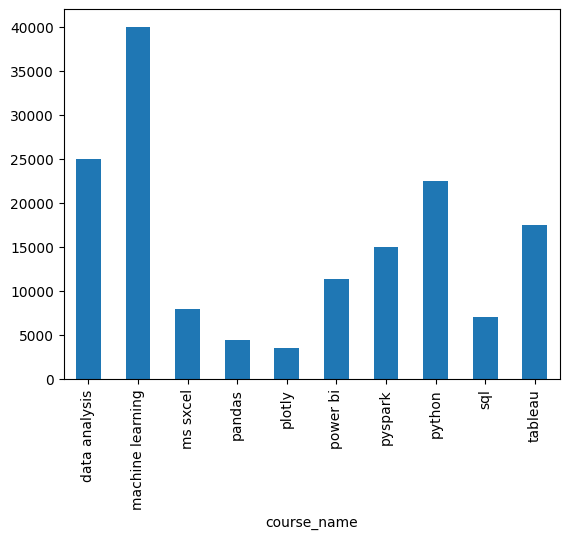

In [ ]:
total_registration.groupby('course_name')['price'].sum().plot(kind='bar') # <- per course

In [ ]:
# students enrolled in both months

temp = nov.merge(dec,on='student_id',how='inner')['student_id'].unique()

students[students['student_id'].isin(temp)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


In [ ]:
## self join -> and column names are different

In [ ]:
students.merge(students,how='inner',left_on='partner',right_on='student_id')[['name_x','name_y']]

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey


In [ ]:
# alternate syntex for merge

pd.merge(students,regs,how='inner',on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


In [ ]:
temp = deliveries.merge(matches,left_on='match_id',right_on='id')

six_df = temp [(temp['batsman_runs'] == 6) | (temp['batsman_runs'] == 7)]

num_sixes = six_df.groupby('venue')['venue'].count() #<-- total number of sixes

In [ ]:
num_matches = matches['venue'].value_counts()

In [ ]:
(num_sixes/num_matches).sort_values(ascending = False).head(3)

,0
venue,
Holkar Cricket Stadium,17.600000
M Chinnaswamy Stadium,13.227273
Sharjah Cricket Stadium,12.666667


In [ ]:
# orange cap holder of each season

temp.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending= False).drop_duplicates(subset ='season',keep = 'first')

,season,batsman,batsman_runs
1383,2016,V Kohli,973
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1422,2017,DA Warner,641
446,2010,SR Tendulkar,618
115,2008,SE Marsh,616
502,2011,CH Gayle,608
229,2009,ML Hayden,572
1148,2015,DA Warner,562


In [ ]:
# -> what happens in default when we do merge but without join on

# *#multiindex objects*

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# why series is 1d -> need only 1 information to get item
# in df -> to get 1 info need to give 2 inputs

index_val = [('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022), ('ece', 2019), ('ece', 2020), ('ece', 2021), ('ece', 2022)]

multi_index_series = pd.Series([10,123,45,45,676,565,34,35],index=index_val)
# -> this will work but the index values are tightly coupled and we can;t get only one information -> only cse
multi_index_series[('cse',2019)]
# multi_indexing -> hierarchical indexing

np.int64(10)

In [ ]:
 # multi_indexing -> hierarchical indexing

 # to properly create indexing -> we would require to create multi_index obj

# 1. from pd.MultiIndex.from_tuples()
index_val = [('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022), ('ece', 2019), ('ece', 2020), ('ece', 2021), ('ece', 2022)]
m_obj = pd.MultiIndex.from_tuples(index_val) # will create multi-index objcect of tuple pairs

m_obj2 = pd.MultiIndex.from_product([['AI','ML'],[2021,2022,2023,2024,2025],['Kunal','Bharat']]) # provide 2D list of objects
m_obj2

MultiIndex([('AI', 2021,  'Kunal'),
            ('AI', 2021, 'Bharat'),
            ('AI', 2022,  'Kunal'),
            ('AI', 2022, 'Bharat'),
            ('AI', 2023,  'Kunal'),
            ('AI', 2023, 'Bharat'),
            ('AI', 2024,  'Kunal'),
            ('AI', 2024, 'Bharat'),
            ('AI', 2025,  'Kunal'),
            ('AI', 2025, 'Bharat'),
            ('ML', 2021,  'Kunal'),
            ('ML', 2021, 'Bharat'),
            ('ML', 2022,  'Kunal'),
            ('ML', 2022, 'Bharat'),
            ('ML', 2023,  'Kunal'),
            ('ML', 2023, 'Bharat'),
            ('ML', 2024,  'Kunal'),
            ('ML', 2024, 'Bharat'),
            ('ML', 2025,  'Kunal'),
            ('ML', 2025, 'Bharat')],
           )

In [ ]:
# create multi_index series
multi_index_series = pd.Series([1,2,3,4,5,6,7,8],index=m_obj)
multi_index_series # <- this is 2D multi_index series -> need to tell 2 info
# why series not df? -> we can convert it into df

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [ ]:
# can fetch roes like that
multi_index_series['cse']

,0
2019,1
2020,2
2021,3
2022,4


In [ ]:
multi_index_series # <- this is 2D multi_index series -> need to tell 2 info
# why series not df? -> we can convert it into df using unstack

multi_index_series.unstack() # <-- innermost will converted into column

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [ ]:
# can do the opposite too -> from stack
unstacked_series = multi_index_series.unstack().copy()
unstacked_series.stack() # will again gets converted

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [ ]:
# then why we use multi_index series?
# higer dimension data is represented to lower dimension -> main gist

In [ ]:
branch_df1 = pd.DataFrame(
    [
        [1, 2],
        [3, 4],
        [5, 6],
        [7, 8],
        [9, 10],
        [11, 12],
        [13, 14],
        [15, 16],
    ],
    index = m_obj,
    columns=['avg_package', 'students']
)

branch_df1.loc['cse']


# implementation level -> index and columns are same

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [ ]:
# Create the DataFrame with MultiIndex columns
branch_df2 = pd.DataFrame(
    [
        [1, 2, 0, 0],
        [3, 4, 0, 0],
        [5, 6, 0, 0],
        [7, 8, 0, 0],
    ],
    index=[2019, 2020, 2021, 2022],
    columns=pd.MultiIndex.from_product([['delhi', 'mumbai'], ['avg_package', 'students']])
)

# Display the DataFrame
print(branch_df2)
branch_df2['delhi']['avg_package']

           delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0


,avg_package
2019,1
2020,3
2021,5
2022,7


In [ ]:
branch_df2.loc[2019] # will get multi_index series as return

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [ ]:
# Create the DataFrame with MultiIndex columns
branch_df3 = pd.DataFrame(
    [
        [1, 2, 0, 0],
        [3, 4, 0, 0],
        [5, 6, 0, 0],
        [7, 8, 0, 0],
        [9, 10, 0, 0],
        [11, 12, 0, 0],
        [13, 14, 0, 0],
        [15, 16, 0, 0],
    ],
    index=m_obj,  # You need to define 'multiindex' before this
    columns=pd.MultiIndex.from_product([['delhi', 'mumbai'], ['avg_package', 'students']])
)

# if i get something out of 2D list

a = branch_df3.stack(future_stack=True).stack(future_stack=True)
print(type(a))
#a.loc['delhi'] # <-- this is 3D sereis therefore it will throw error and we need to specify the level
# .loc['delhi'], pandas looks only at level 0, but 'delhi' is nested deeper in the index
print(a)
a.xs('delhi',level=3) # <--- to get the deeper index

<class 'pandas.core.series.Series'>
cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
  

cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

In [ ]:
# stacking and unstacking
# stack will not work on series
k = branch_df1.unstack().unstack() # internal index become column and already column become multiindex
# -> if nothing is reamaining internal -> then convert it into series
print(k)
print(type(k))

# how to visualize deeper stacking and unstacking -> till it becomes series

branch_df2.stack().stack() # -> 3D index series

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64
<class 'pandas.core.series.Series'>


/tmp/ipython-input-1714655020.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack().stack() # -> 3D index series


2019  avg_package  delhi     1
                   mumbai    0
      students     delhi     2
                   mumbai    0
2020  avg_package  delhi     3
                   mumbai    0
      students     delhi     4
                   mumbai    0
2021  avg_package  delhi     5
                   mumbai    0
      students     delhi     6
                   mumbai    0
2022  avg_package  delhi     7
                   mumbai    0
      students     delhi     8
                   mumbai    0
dtype: int64

In [ ]:
# Useful tricks & gotchas
# stack() defaults to dropna=True (drops missing combinations). Use dropna=False to keep NaNs.
# unstack() can raise ValueError: index contains duplicate entries, cannot reshape if index tuples aren’t unique. Use reset_index() to flatten before unstack.
# Order matters: stacking levels in different order gives different index order — use swaplevel() or stack with level= names to control final order.
# df.T (transpose) swaps index/columns — sometimes easier to visualize a problematic orientation by transposing.
# To “see” MultiIndex levels: df.index.names, df.columns.names, df.index.to_frame() and df.columns.to_frame() are great for inspecting structure.
# df.reset_index() converts index levels to columns — good intermediate step for melt or grouping.

In [ ]:
k = branch_df3
print(k)
print(k.info())
print(k.unstack())
print(k.unstack().info()) # -> for column level it will show each breakdown

               delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ece', np.int64(2022))
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 632.0+ bytes
No

## rows extraction

In [ ]:
# extracting rows from 4D dataframe
branch_df3.loc[('cse',2022)] # <-- gets single row

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [ ]:
branch_df3.loc[('cse',2021):('ece',2022)]

delhi               mumbai         
         avg_package students avg_package students
cse 2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [ ]:
# iloc
branch_df3.iloc[1:6]

delhi               mumbai         
         avg_package students avg_package students
cse 2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0

## columns extraction

In [ ]:
branch_df3['delhi'] # <-- gets outer index and then can index again to get columns

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [ ]:
# custom index

branch_df3.iloc[:,[1,2]] # <-- multiple fetching

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [ ]:
# slicing in both

branch_df3.iloc[[0,4],[1,2]] # <-- fancy indexing

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


## sorting index of multi_index df


In [ ]:
# sorting will happen on both level
print(branch_df3.sort_index(ascending=False)) # <-- can provide list if we want differnt sort
print(branch_df3.sort_index(ascending=[False,True]))
print(branch_df3.sort_index(level= 1, ascending=False)) # can sort only on basis of year can

               delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0
               delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8  

In [ ]:
# Transpose
print(branch_df3)
print(branch_df3.transpose()) # can work on normal dataframe as well

               delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
                    cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0


In [ ]:
# swaplevel
print(branch_df3)
print(branch_df3.swaplevel())  # row_wise swapping
print(branch_df3.swaplevel(axis=1)) # column_wise swapping


               delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
               delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16  

## long vs wide

In [ ]:
# wide -> single row for each data point
# long -> many rows and many attributes

In [ ]:
# melt -> wide -> long

# melt -> branch with year
pd.DataFrame({
    'cse': [120],
    'ece': [100],
    'mech': [50]
}).melt(var_name='branch', value_name='num_students')


,branch,num_students
0,cse,120
1,ece,100
2,mech,50


In [ ]:
pd.DataFrame(
    {
        'branch': ['cse', 'ece', 'mech'],
        '2020': [100, 150, 60],
        '2021': [120, 130, 80],
        '2022': [150, 140, 70]
    }
).melt(id_vars = ['branch'],var_name = 'Year',value_name='students')


,branch,Year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [ ]:
# pivot -> long to long
confirmed = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/4. multiindex/time_series_covid19_confirmed_global.csv')
death = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/4. multiindex/time_series_covid19_deaths_global.csv')

In [ ]:
death_melted = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Deaths',var_name='Date') # -> wide format
death_melted

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,4024


In [ ]:
confirm_melted = confirmed.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Confirmed',var_name='Date')
confirm_melted

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661


In [ ]:
confirm_melted.merge(death_melted,on= ['Province/State','Country/Region','Lat','Long','Date'])[['Country/Region','Date','Confirmed','Deaths']]

,Country/Region,Date,Confirmed,Deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


In [ ]:
# so basically melt is something we can use when a specific field which is supposedly a row is in column format -> like a categorical data or Date kind of field -> has something in common


In [ ]:
# how to initialize multi index dataframe -> from csv

## Pivot Table


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips') # > pivots mostly used on categorical column
# -> pivot returns Dataframe
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# gender basis average total bill
df.groupby('sex')['total_bill'].sum() # -> infuture will not group the blank groups

/tmp/ipython-input-1381191884.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['total_bill'].sum() # -> infuture will not group the blank groups


,total_bill
sex,
Male,3256.82
Female,1570.95


In [ ]:
df.groupby(['sex','smoker'])['total_bill'].sum() # <-- returns multiindex database
df.groupby(['sex','smoker'])['total_bill'].sum().unstack()

/tmp/ipython-input-10624447.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])['total_bill'].sum() # <-- returns multiindex database
/tmp/ipython-input-10624447.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])['total_bill'].sum().unstack()


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [ ]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')
# > default value mean for aggregate -> mean/median/max --all releted math functions

/tmp/ipython-input-4144999295.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [ ]:
# what if we don't provide values? -> we have to now -> with newer pandas
df.pivot_table(index='sex',columns='smoker',values=['total_bill', 'tip', 'size'])


/tmp/ipython-input-450311949.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values=['total_bill', 'tip', 'size'])


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [ ]:
# multidimensional
k = df.pivot_table(index=['sex','smoker'],columns=['day','time'],values={'size':'mean','tip':'max','total_bill':'sum'},observed=False)
k

size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [ ]:
# calculate totals
df.pivot_table(index='sex',columns='smoker',values=['total_bill', 'tip', 'size'],margins=True,margins_name='Total')
# ^ gives sub total and grand and we don;t have option of grand total


/tmp/ipython-input-460148067.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values=['total_bill', 'tip', 'size'],margins=True,margins_name='Total')


size                           tip                     total_bill  \
smoker       Yes        No     Total       Yes        No     Total        Yes   
sex                                                                             
Male    2.500000  2.711340  2.630573  3.051167  3.113402  3.089618  22.284500   
Female  2.242424  2.592593  2.459770  2.931515  2.773519  2.833448  17.977879   
Total   2.408602  2.668874  2.569672  3.008710  2.991854  2.998279  20.756344   

                              
smoker         No      Total  
sex                           
Male    19.791237  20.744076  
Female  18.105185  18.056897  
Total   19.188278  19.785943

In [ ]:
# plorring Graphs
expense = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/5. Datetime&vectorized_string/expense_data.csv')
expense

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


<Axes: xlabel='Category'>

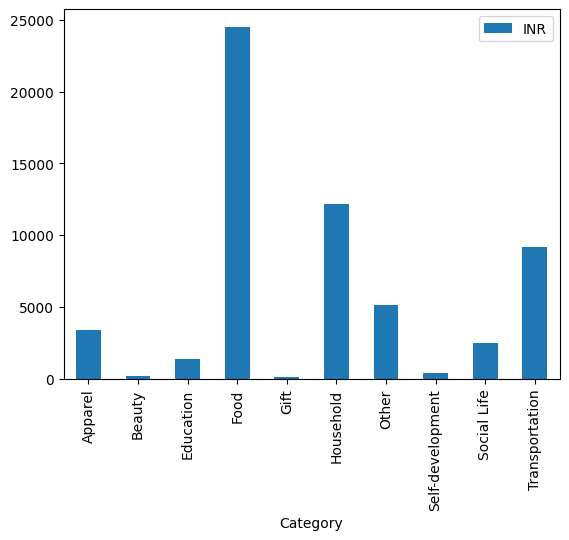

In [ ]:
expense[expense['Income/Expense']=='Expense'].pivot_table(index='Category',values='INR',aggfunc='sum',fill_value=0).plot(kind='bar')

# *#string operation*

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# vectorized operation ->
a = np.array([1,2,3,3,4])
a*3 #<- this is vectorized operation -> applied on each rows

array([ 3,  6,  9,  9, 12])

In [ ]:
s = ['cat',None,'rat','mat']
# [i.startswith('c') for i in s] # <-- slow and cannot handle None type objects
# str -> string accessor
s = pd.Series(s)
s.str.startswith('c') # <- fast and optimized

,0
0,True
1,None
2,False
3,False


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/5. Datetime&vectorized_string/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# common functions
# upper/lower/title/capitalize/title
df['Name'].str.upper()
df['Name'].str.lower()
df['Name'].str.capitalize()
df['Name'].str.title()

# len
df['Name'].str.len().max() # <-max string name
df['Name'][df['Name'].str.len() == 82].values[0]

# strip-> remove leading/trailing spaces

df['Name'].str.strip()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
# split  -> get
df['Last_name'] = df['Name'].str.split(',').str.get(0) # .get extracts element from position
# from list like value
df

df[['Title','Full_name']] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ',n=1,expand=True)
# split -> n = 1 will do only first split and expand will convert that Series to dataframe

df['Title'].value_counts()

,count
Title,
Mr.,517
Miss.,182
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Col.,2
Mlle.,2
Major.,2


In [ ]:
# replace
df['Title'] = df['Title'].str.replace('Ms.','Miss.')
df['Title'] = df['Title'].str.replace('Mlle.','Miss.')
df['Title'].value_counts()

,count
Title,
Mr.,517
Miss.,185
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Major.,2
Col.,2
Don.,1


In [ ]:
# filtering  -> startswith / endswith /.isalpha / .isdigit

df[df['Full_name'].str.startswith('Ku')]
df[df['Full_name'].str.endswith('W')]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_name,Title,Full_name
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S,Shutes,Miss.,Elizabeth W


In [ ]:
# applying regex -> regular expression

# serch john both name
df[df['Full_name'].str.contains('john',case=False)] # < - use contains to give detail commands

# surname starts and ends with vovel
df[df['Last_name'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_name,Title,Full_name
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Uruchurtu,Don.,Manuel E
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mrs.,Josef (Josefine Franchi)
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,Albimona,Mr.,Nassef Cassem
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S,Ali,Mr.,Ahmed
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mr.,Josef
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr.,Ramon
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S,Angle,Mrs.,"William A (Florence ""Mary"" Agnes Hughes)"
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S,Ali,Mr.,William
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,Alhomaki,Mr.,Ilmari Rudolf


In [ ]:
# slicing -> same logic as string slicing

df['Full_name'].str[::-1]

,Full_name
0,sirraH newO
1,)reyahT sggirB ecnerolF( yeldarB nhoJ
2,aniaL
3,)leeP yaM yliL( htaeH seuqcaJ
4,yrneH mailliW
...,...
886,sazouJ
887,htidE teragraM
888,"""eirraC"" neleH enirehtaC"
889,llewoH lraK


# *#vectorized date/time*

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# timestamp object (like series / df ) -> perticular instance of time

k = pd.Timestamp('2023/04/20') # <- year month date
type(k)

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# variations
l =pd.Timestamp('2025-04-20')
m = pd.Timestamp('2025, 4, 20').day
# year
pd.Timestamp('2025')

print(l,m)

2025-04-20 00:00:00 20


In [ ]:
# using text
n = pd.Timestamp('8 November 2025 9:21 PM')
print(n)

2025-11-08 21:21:00


In [ ]:
# provide time as well
n = pd.Timestamp(2025, 4, 20, 9, 21, 5)
print(n)

2025-04-20 09:21:05


In [ ]:
# python's date time object

import datetime as dt

k = dt.datetime(2025,5,6,9,34,35) # <- represent python's inbuilt
l = pd.Timestamp(k)

2025-05-06 09:34:35


In [ ]:
# fetching attributes
l.day
l.month
l.year
l.minute
l.hour

9

In [ ]:
# idf python has datetime then why pandas has timestamp

# convienent ->  datetime -> performance issues with big data
# internally - datetime64 -> can represent compactly #-> supports vectorized ops

date = np.datetime64('2025-11-08')
date + np.arange(11)

array(['2025-11-08', '2025-11-09', '2025-11-10', '2025-11-11',
       '2025-11-12', '2025-11-13', '2025-11-14', '2025-11-15',
       '2025-11-16', '2025-11-17', '2025-11-18'], dtype='datetime64[D]')

In [ ]:
# timestamp for single entry

# datetime index -> multiple dates

In [ ]:
date_time_obj = pd.DatetimeIndex(['2022-1-1', '2023-1-1','2024-1-1'])
print(type(date_time_obj))
print(type(date_time_obj[0])) # <-- one is timestamp

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2024,1,1)]) # using python
pd.DatetimeIndex([pd.Timestamp('2022/1/1'),pd.Timestamp('2024/1/1')]) # using pandas

DatetimeIndex(['2022-01-01', '2024-01-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
# can give it as a index for any series or DF
ser = pd.Series([1,2,3],index=date_time_obj)
print(ser)

df = pd.DataFrame([[1,1,1,1],
                  [2,2,3,3],
                  [2,5,6,7]],index=date_time_obj)
print(df)

2022-01-01    1
2023-01-01    2
2024-01-01    3
dtype: int64
            0  1  2  3
2022-01-01  1  1  1  1
2023-01-01  2  2  3  3
2024-01-01  2  5  6  7


In [ ]:
# date_range function

k = pd.date_range('2025/1/5','2025/2/1',freq='B') # every 3 days -> 3D
# for network days - B

print(type(k))
print(k)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2025-01-06', '2025-01-07', '2025-01-08', '2025-01-09',
               '2025-01-10', '2025-01-13', '2025-01-14', '2025-01-15',
               '2025-01-16', '2025-01-17', '2025-01-20', '2025-01-21',
               '2025-01-22', '2025-01-23', '2025-01-24', '2025-01-27',
               '2025-01-28', '2025-01-29', '2025-01-30', '2025-01-31'],
              dtype='datetime64[ns]', freq='B')


In [ ]:
# W -> one week per day
k = pd.date_range('2025/1/5','2025/4/1',freq='W-MON') # w -> default take sunday
# can specify
print(k)


DatetimeIndex(['2025-01-06', '2025-01-13', '2025-01-20', '2025-01-27',
               '2025-02-03', '2025-02-10', '2025-02-17', '2025-02-24',
               '2025-03-03', '2025-03-10', '2025-03-17', '2025-03-24',
               '2025-03-31'],
              dtype='datetime64[ns]', freq='W-MON')


In [ ]:
k = pd.date_range('2025/1/5','2025/2/1',freq='6h') # can put any thing
print(k) # timestamp for each hour

DatetimeIndex(['2025-01-05 00:00:00', '2025-01-05 06:00:00',
               '2025-01-05 12:00:00', '2025-01-05 18:00:00',
               '2025-01-06 00:00:00', '2025-01-06 06:00:00',
               '2025-01-06 12:00:00', '2025-01-06 18:00:00',
               '2025-01-07 00:00:00', '2025-01-07 06:00:00',
               ...
               '2025-01-29 18:00:00', '2025-01-30 00:00:00',
               '2025-01-30 06:00:00', '2025-01-30 12:00:00',
               '2025-01-30 18:00:00', '2025-01-31 00:00:00',
               '2025-01-31 06:00:00', '2025-01-31 12:00:00',
               '2025-01-31 18:00:00', '2025-02-01 00:00:00'],
              dtype='datetime64[ns]', length=109, freq='6h')


In [ ]:
k = pd.date_range('2025/1/5','2025/4/1',freq='ME') # MS for month start
print(k) # timestamp for monthend

DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31'], dtype='datetime64[ns]', freq='ME')


In [ ]:
# year end
k = pd.date_range('2025/1/5','2030/2/1',freq='YE') # Year end  YS for starting day
print(k) # timestamp for each hour

DatetimeIndex(['2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')


In [ ]:
# want to give num input _> like show me next 25 days

k = pd.date_range('2025/1/5',periods=25,freq='D')
print(k) # next 25 days

k = pd.date_range('2025/1/5',periods=25,freq='6h')
print(k) # timestamp for next 25 6h

k = pd.date_range('2025/1/5',periods=25,freq='Y')
print(k) # timestamp next 25 gears

DatetimeIndex(['2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10', '2025-01-11', '2025-01-12',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-18', '2025-01-19', '2025-01-20',
               '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24',
               '2025-01-25', '2025-01-26', '2025-01-27', '2025-01-28',
               '2025-01-29'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2025-01-05 00:00:00', '2025-01-05 06:00:00',
               '2025-01-05 12:00:00', '2025-01-05 18:00:00',
               '2025-01-06 00:00:00', '2025-01-06 06:00:00',
               '2025-01-06 12:00:00', '2025-01-06 18:00:00',
               '2025-01-07 00:00:00', '2025-01-07 06:00:00',
               '2025-01-07 12:00:00', '2025-01-07 18:00:00',
               '2025-01-08 00:00:00', '2025-01-08 06:00:00',
               '2025-01-08 12:00:00', '2025-01-08 18:00:00',
        

/tmp/ipython-input-1581175988.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  k = pd.date_range('2025/1/5',periods=25,freq='Y')


### to_datetime function

In [ ]:
# most used

s = pd.Series(['2022-1-1', '2023-1-1','2024-1-1'])
print(s)

ts = pd.to_datetime(s)
print(ts) # <-- this will automatically convert into date time

# like string we can use the datetime functions on it via dt

ts.dt.day # -> this will give me data of days
ts.dt.year
ts.dt.month_name()
ts.dt.day_name()

0    2022-1-1
1    2023-1-1
2    2024-1-1
dtype: object
0   2022-01-01
1   2023-01-01
2   2024-01-01
dtype: datetime64[ns]


,0
0,Saturday
1,Sunday
2,Monday


In [ ]:
s = pd.Series(['2022-1-1', '2023-1-1','2024-120-1']) # error entry

ts = pd.to_datetime(s,errors='coerce')
print(ts) # will show Not a Time -> like NA

0   2022-01-01
1   2023-01-01
2          NaT
dtype: datetime64[ns]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/5. Datetime&vectorized_string/expense_data.csv')

In [ ]:
expense.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [ ]:
df.info()

df['Date']
# to convert into date we will use ->
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[

In [ ]:
df['Month'] = df['Date'].dt.month_name()

In [ ]:
# is month end / quarter end

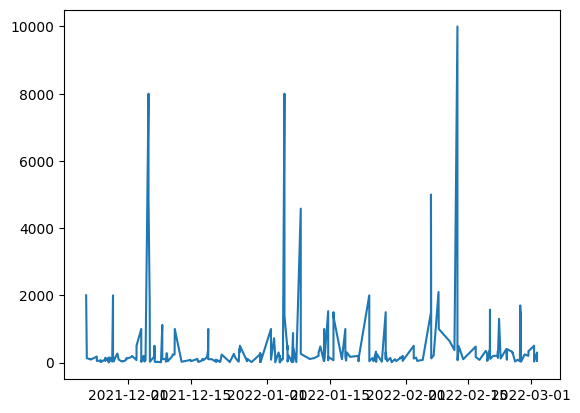

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Date'],df['INR'])

<Axes: xlabel='Month'>

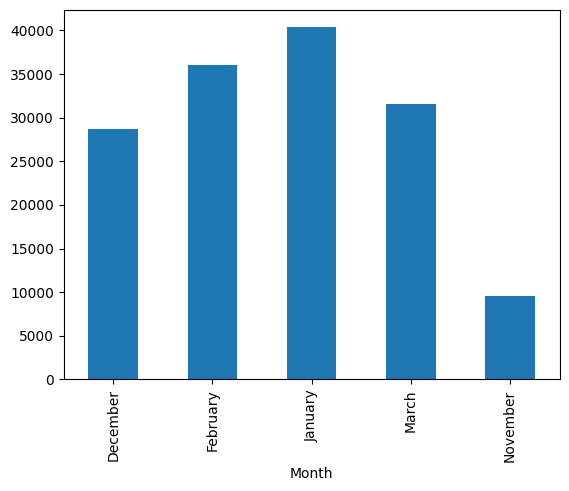

In [ ]:
# Daywise expeense

df['Day_name'] = df['Date'].dt.day_name()
df.groupby('Day_name')['INR'].sum().plot(kind='bar')
df.groupby('Month')['INR'].sum().plot(kind='bar')

# *#Timeseries Analysis*

In [ ]:
import numpy as np
import pandas as pd

## Timedelta object

In [ ]:
# difference between 2 timestamps

# -> created using calculating difference between timestamps
t1 = pd.Timestamp('20/04/1999')
t2 = pd.Timestamp('20/04/2025')
t2 - t1

Timedelta('9497 days 00:00:00')

In [ ]:
# standalone creation
k = pd.Timedelta(days=4,hours=5,minutes=34) # timedelta object of 4 days

In [ ]:
# Arithematic
t2 + k  # -> create a new timestamp with addition of delta

Timestamp('2025-04-24 05:34:00')

In [ ]:
# can add it into datetime range
date_range_index = pd.date_range(start='1/1/2025',end='2/2/2025',freq = '3D')
print(date_range_index)
print(date_range_index + k)

DatetimeIndex(['2025-01-01', '2025-01-04', '2025-01-07', '2025-01-10',
               '2025-01-13', '2025-01-16', '2025-01-19', '2025-01-22',
               '2025-01-25', '2025-01-28', '2025-01-31'],
              dtype='datetime64[ns]', freq='3D')
DatetimeIndex(['2025-01-05 05:34:00', '2025-01-08 05:34:00',
               '2025-01-11 05:34:00', '2025-01-14 05:34:00',
               '2025-01-17 05:34:00', '2025-01-20 05:34:00',
               '2025-01-23 05:34:00', '2025-01-26 05:34:00',
               '2025-01-29 05:34:00', '2025-02-01 05:34:00',
               '2025-02-04 05:34:00'],
              dtype='datetime64[ns]', freq='3D')


In [ ]:
# example
df = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/5. Datetime&vectorized_string/deliveries.csv')
df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

/tmp/ipython-input-3472121163.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])
/tmp/ipython-input-3472121163.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivery_date'] = pd.to_datetime(df['delivery_date'])


In [ ]:
df['delivery_period'] = df['delivery_date'] - df['order_date'] # <- timedelta obj.
df['delivery_period'].mean() # <-- average delivery time

Timedelta('1217 days 22:53:53.532934128')

In [ ]:
# Time_series -> deal with timeseries data with pandas!!
'''
- Tracks a sample over time
- to understand what factors influence certain variables from P2P
 '''

'\n- Tracks a sample over time\n- to understand what factors influence certain variables from P2P\n '

In [ ]:
google = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/5. Datetime&vectorized_string/google.csv')
yt = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/5. Datetime&vectorized_string/yt.csv')

In [ ]:
google['Date'] = pd.to_datetime(google['Date'])
yt['Date'] = pd.to_datetime(yt['Date'])

In [ ]:
# usually suggestion to make date as index
google.set_index('Date',inplace=True)

In [ ]:
yt.set_index('Date',inplace=True)

In [ ]:
# fetch specific date - 31/12/2022
yt.loc['22/12/2024']
google.loc['22/12/2021']


,2021-12-22
Open,2882.000000
High,2946.060059
Low,2879.260010
Close,2938.979980
Adj Close,2938.979980
Volume,921900.000000


In [ ]:
# partial indexing
yt.loc['2022-12'] # -> december 2022
yt.loc['2024'] # -> all year data

,subscribers,views,watchtime_hours,comments_added
Date,,,,
2024-01-01,32147,33303,300.49,717
2024-01-02,32180,33947,335.77,797
2024-01-03,32227,35804,337.36,369
2024-01-04,32253,35848,346.91,601
2024-01-05,32283,35813,350.20,928
...,...,...,...,...
2024-12-27,42254,42364,306.91,1088
2024-12-28,42261,42637,353.30,1233
2024-12-29,42271,45198,318.94,700


In [ ]:
yt['month_name'] = yt.index.month_name()
yt['weekday_name'] = yt.index.day_name()
yt['quarter'] = yt.index.quarter
yt

,subscribers,views,watchtime_hours,comments_added,month_name,weekday_name,quarter
Date,,,,,,,
2020-11-10,1043,4013,38.37,77,November,Tuesday,4
2020-11-11,1076,4994,34.37,144,November,Wednesday,4
2020-11-12,1095,7074,69.70,116,November,Thursday,4
2020-11-13,1142,7134,48.16,165,November,Friday,4
2020-11-14,1154,7181,64.50,165,November,Saturday,4
...,...,...,...,...,...,...,...
2025-11-06,50646,50945,340.55,1425,November,Thursday,4
2025-11-07,50676,52198,348.22,998,November,Friday,4
2025-11-08,50683,52466,415.90,681,November,Saturday,4


In [ ]:
google['month_name'] = google.index.month_name()
google['weekday_name'] = google.index.day_name()
google['quarter'] = google.index.quarter
google

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3
...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100,May,Monday,2
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800,May,Tuesday,2
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100,May,Wednesday,2


In [ ]:
# slicing - Range of dates

yt.loc['2022-12-15':'2023-2-15']

,subscribers,views,watchtime_hours,comments_added,month_name,weekday_name,quarter
Date,,,,,,,
2022-12-15,21940,25366,220.31,686,December,Thursday,4
2022-12-16,21959,25211,188.84,310,December,Friday,4
2022-12-17,21990,25959,203.86,626,December,Saturday,4
2022-12-18,22028,24466,169.95,491,December,Sunday,4
2022-12-19,22070,26489,206.04,704,December,Monday,4
...,...,...,...,...,...,...,...
2023-02-11,23345,26421,191.47,693,February,Saturday,1
2023-02-12,23363,27335,192.90,460,February,Sunday,1
2023-02-13,23393,25880,211.28,316,February,Monday,1


In [ ]:
# get on date at yearly frequency

temp_range = pd.date_range(start ='1/1/2022',end='1/1/2025',freq='YS') # generate datetime index
# or we can give dateoffset index
temp_range = pd.date_range(start ='1/1/2022',end='1/1/2025',freq=pd.DateOffset(years=1)) # this is how we will get it
# temp_range = pd.date_range(start ='1/1/2022',end='1/1/2025',freq=pd.Timedelta(Years=1)) # because timedelts can;t work with year

print(temp_range)
yt.loc[temp_range]

DatetimeIndex(['2022-01-01', '2023-01-01', '2024-01-01', '2025-01-01'], dtype='datetime64[ns]', freq='<DateOffset: years=1>')


,subscribers,views,watchtime_hours,comments_added,month_name,weekday_name,quarter
2022-01-01,12595,15957,158.22,300,January,Saturday,1
2023-01-01,22375,24253,187.99,690,January,Sunday,1
2024-01-01,32147,33303,300.49,717,January,Monday,1
2025-01-01,42316,42064,299.65,705,January,Wednesday,1


<Axes: xlabel='Date'>

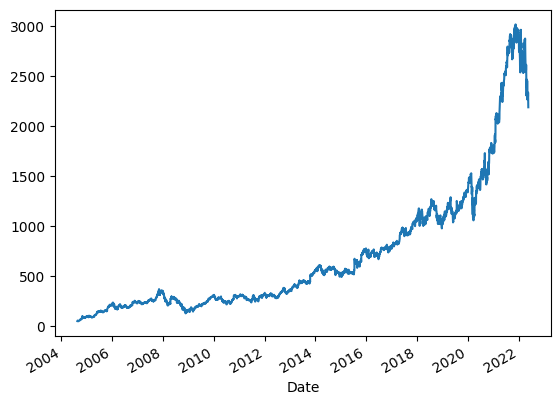

In [ ]:
# plotting
google['Close'].plot()

<Axes: xlabel='Date'>

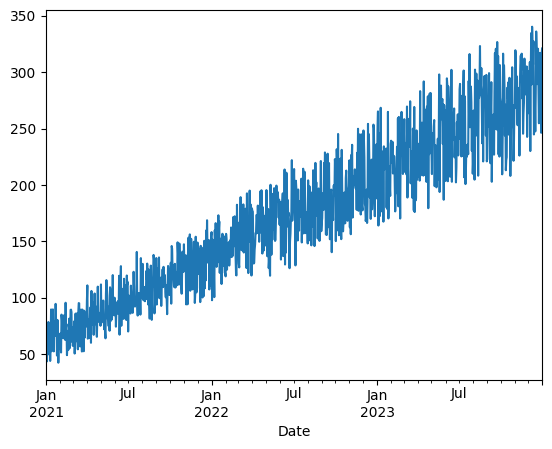

In [ ]:
# graphs of specific periods
yt.loc['2021':'2023']['watchtime_hours'].plot()

In [ ]:
# frequency
google.index # <-- here frequency is none

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

In [ ]:
google.asfreq('D') # <--- added Sat sunday with NAN as data is on daily frequency
# B for business days
google = google.asfreq('B')
google.asfreq('QE') # -> per quarter -> date of last day of each quarter
google.asfreq('h',method='ffill') # -> hourly

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 01:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 02:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 03:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 04:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-19 20:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 21:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 22:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0


<Axes: xlabel='month_name'>

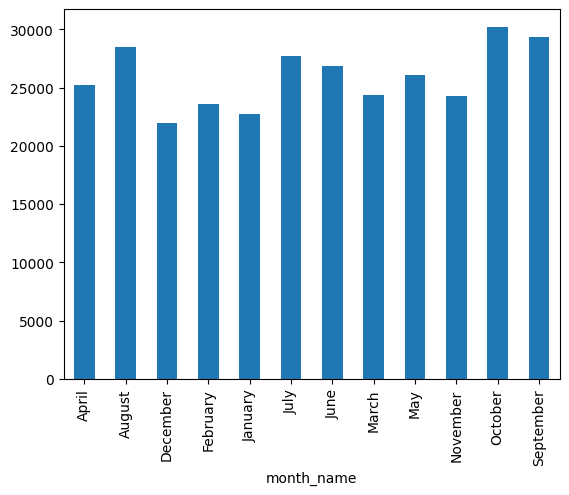

In [ ]:
# monthly trend
yt.groupby('month_name')['subscribers'].mean().plot(kind='bar')

## resampling

In [ ]:
# resampling -> changing the frequency of timeseries observations
'''
1. Upsampling -> increase the frequency min -> sec
2. Downsampling -> decrease the frequency days -> months

 '''


' \n1. Upsampling -> increase the frequency min -> sec\n2. Downsampling -> decrease the frequency days -> months \n\n '

/tmp/ipython-input-3820933037.py:3: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  google['Close'].resample('YE').mean().plot()


<Axes: xlabel='Date'>

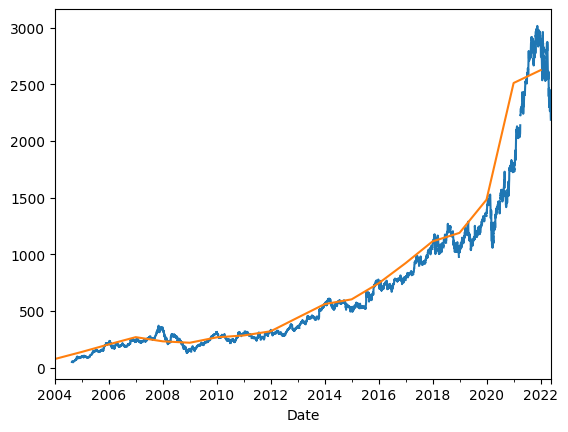

In [ ]:
# downsample  -> does this works only on Date as index ?
google['Close'].plot()
google['Close'].resample('YE').mean().plot()

<Axes: xlabel='Date'>

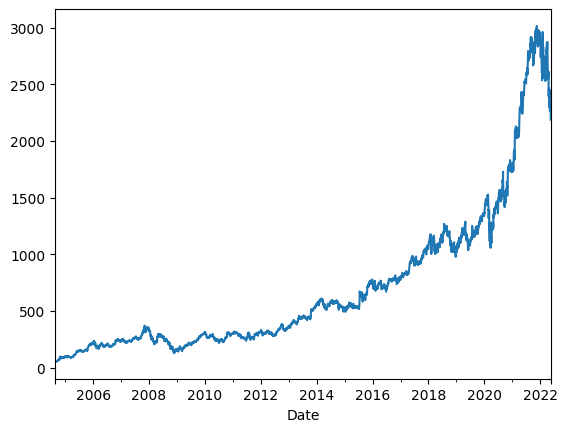

In [ ]:
# upsampling -> not used that often
google['Close'].resample('h').interpolate(method='linear').plot() # -> use method

## Rolling window - Smoothning

In [ ]:
# timeseries data in it's original format can be quitet volatile on smaller aggregate levels
# therefore the concept of rolling and smoothing is useful technique

<Axes: xlabel='Date'>

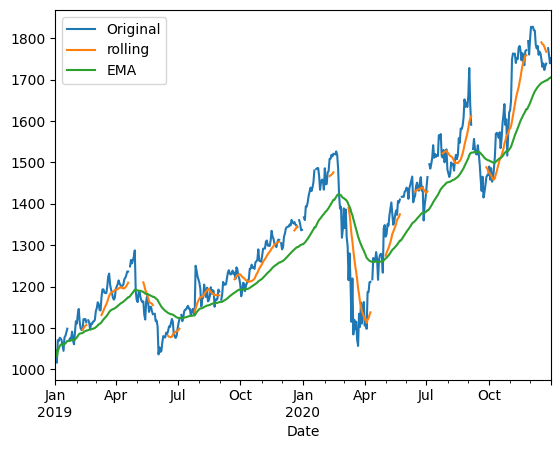

In [ ]:
# rolling avg -> weightate same
# exponential moving avg -> recent has most weightage

df = google.loc['2019':'2020']

df['Close'].plot(legend=True,label= 'Original')
df['Close'].rolling(15).mean().plot(legend=True, label= 'rolling')   #<-- aggregate function
df['Close'].ewm(30).mean().plot(legend=True, label= 'EMA') # -> exponential smoothing

## shifting

In [ ]:
# shift the numbers up or down by desired number of periods

google['Close'].shift(-2) # -> slide all the data up or down

,Close
Date,
2004-08-19,54.495735
2004-08-20,52.239197
2004-08-23,52.802086
2004-08-24,53.753517
2004-08-25,52.876804
...,...
2022-05-16,2248.020020
2022-05-17,2214.909912
2022-05-18,2186.260010


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/5. Datetime&vectorized_string/login.csv',
                 header=None)
df = df[[1,2]]
df.rename(columns={ 1: 'user_id',2:'login_time'},inplace=True)
df['login_time'] = pd.to_datetime(df['login_time'])

In [ ]:
# need to check average duration gap between logins
user_df = df[df['user_id']== 413].copy() #<- take the copy because it will interfare
user_df['shifted_time']= user_df['login_time'].shift(1)
user_df

,user_id,login_time,shifted_time
11,413,2017-01-09 12:29:25,NaT
12,413,2017-01-09 12:40:39,2017-01-09 12:29:25
14,413,2017-01-09 14:08:04,2017-01-09 12:40:39
33,413,2017-01-10 14:36:23,2017-01-09 14:08:04
35,413,2017-01-10 15:22:45,2017-01-10 14:36:23
...,...,...,...
2958,413,2017-12-29 18:20:32,2017-12-29 18:19:48
2963,413,2017-12-30 13:41:21,2017-12-29 18:20:32
2974,413,2018-01-01 15:16:25,2017-12-30 13:41:21
2982,413,2018-01-02 18:15:45,2018-01-01 15:16:25


In [ ]:
(user_df['login_time']-user_df['shifted_time']).mean()

Timedelta('1 days 15:05:13.384615384')